#Diabetes EDA and ML Prep

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. T**he objective of the dataset is to diagnostically predict whether or not a patient has diabetes**, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

You will perform EDA and prepare (fill in missing values, transform, scale) the dataset for modeling.  Finally, you'll use logistic regression to evaluate how your transformation of the data improved the prediction on Outcome.

---

There are 9 columns
* Pregnancies - Number of times pregnant
* Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure - Diastolic blood pressure (mm Hg)
* SkinThickness - Triceps skin fold thickness (mm)
* Insulin - 2-Hour serum insulin (mu U/ml)
* BMI - Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction - Diabetes pedigree function
* Age (years)
* Outcome - Class variable (0 or 1) 268 of 768 are 1, the others are 0  

---

Grading:  
* Coding style and linear flow.  Can we examine the graphs and read the analysis end-to-end to understand the analysis and choices made. - 15%
* EDA - View the histogram for each variable.  Look at the correlations between all variables.  Observe / analyse interesting relationships between the variables - 20%
* Model prep - For each column, were your assumptions and technique chosen to fill in missing data, transform or scale correct and supported. - 50%
* Model eval - How did the logistic regression perform compared to the baseline.  How well did the student assess the performance, including assessing if there was data "leakage"  - 15%



In [ ]:
#@title Functions to split and model dataset
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

# This function, get_train_test, is designed to split a given DataFrame (df) into training and test sets for both features and target variables.
def get_train_test(df):
  return train_test_split(df.loc[:, df.columns != "Outcome"], df["Outcome"], test_size = .3, random_state=77)


# The function score_data is designed to train a logistic regression model on a given dataset (scored_df_)
# and then evaluate its performance using a confusion matrix.
def score_data(scored_df_):
  X_train, X_test, y_train, y_test = get_train_test(scored_df_)
  model = LogisticRegression()
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  return confusion_matrix(y_test, predictions, labels=model.classes_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for df: 0.7748917748917749
Precision for df: 0.6615384615384615
Recall for df: 0.589041095890411
F1-Score for df: 0.6231884057971014


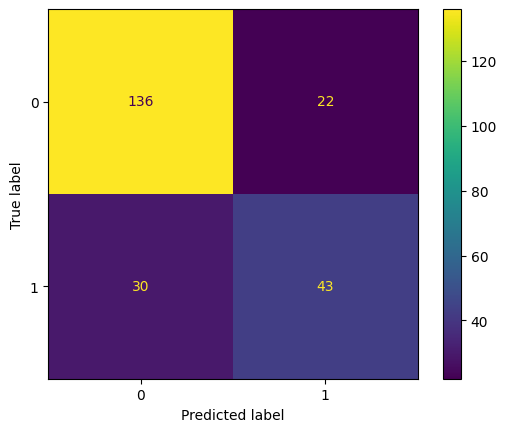

In [ ]:
#@title Loading the data and establishing the baseline
df = pd.read_csv('diabetes.csv')
cm = score_data(df)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Calculate Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate Precision
precision = TP / (TP + FP)

# Calculate Recall (Sensitivity)
recall = TP / (TP + FN)

# Calculate F1-Score
f1 = 2*((precision*recall)/(precision+recall))

# Print the metrics
print("Accuracy for df:", accuracy)
print("Precision for df:", precision)
print("Recall for df:", recall)
print("F1-Score for df:", f1)

True Positive(TP): 43,
   Flase Positive(FP): 22,
   True Negative(TN): 136,
   True Negative(TN): 30


**Accuracy:** The sum of the values on the diagonal (TP + TN) divided by the total gives the accuracy of the model. In this case, (43 + 136) / (43 + 136 + 30 + 22) = 179 / 231 ≈ 0.7749 or **77.49%**.

**Misclassifications:** There are **52** instances (30 FN + 22 FP) that were misclassified by the model.

**Precision (or Positive Predictive Value):** Measures the accuracy of positive predictions.

Precision = **TP/(TP+FP)** = 43/(43+22) = **0.6615**

Interpretation: Out of all the instances predicted as positive, about **66.15%** were actually positive.

**Recall (or True Positive Rate or Sensitivity):** Measures the accuracy of positive predictions.

Recall = **TP/(TP+FN)** = 43/(43+30) = **0.5890**

Interpretation: Out of all the actual positive instances, the model correctly identified about **58.90%** of them.

**F1 Score:**
It's the harmonic mean of precision and recall, which provides a balance between the two.

F1 Score =  **2*((Precision*Recall)/Precision + Recall)** = 2*((0.6615*0.5890)/0.6615+).5890) = **0.6228**

Interpretation: The F1 score, being a balance between precision and recall, is about 62.28%.

### EDA

In [ ]:
# Display the dataset
df.head(15)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80              0        0  27.1   
13            1      189             60             23      846  30.1   
14            5      166             72             19      175  25.8   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
1                      0.351   31        0  
2                      0.672   32        1  
3                      0.167   21        0  
4                      2.288   33        1  
5                      0.201   30        0  
6                      0.248   26        1  
7                      0.134   29        0  
8                      0.158   53        1  
9                      0.232   54        1  
10                     0.191   30        0  
11                     0.537   34        1  
12                     1.441   57        0  
13                     0.398   59        1  
14                     0.587   51        1

In [ ]:
# checking the dataset's size
df.shape

(768, 9)

In [ ]:
# checking for data types
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
# checking for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

This indicates that there are no null or missing values in any of the columns in your dataset. Since there are no missing values, it means that the dataset is complete in terms of the features/columns provided. We don't need to perform any imputation (filling in missing data) or data cleaning related to null values for this dataset.

0    500
1    268
Name: Outcome, dtype: int64


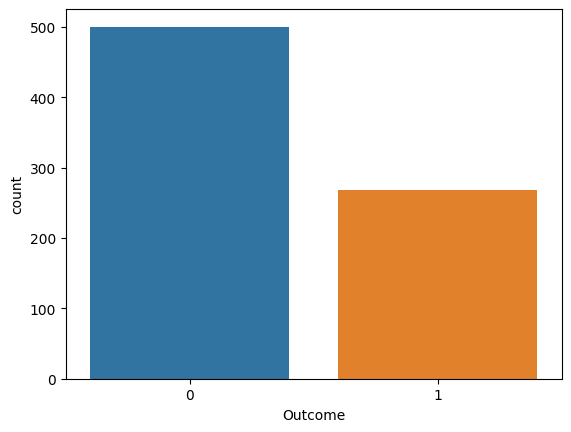

In [ ]:
# checking the proportion of outputs
print(df['Outcome'].value_counts())
sns.countplot(x='Outcome',data=df)
plt.show()

As we can see from the above result the dataset is not balanced in terms of output values.

In [ ]:
# Generating the basic statistics for the dataset
# NOTE: all the entries in the dataset are numeric
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

The **min values of 0** for the columns **Glucose, BloodPressure, SkinThickness, Insulin, BMI** does not make sense because if we think logically BMI or any other indicator can never be physiologically zero. This means there are faulty entries in the given dataset.

**Count the Zero Values:**
Before making any changes, it's a good idea to count how many zero values are in each column. This can help determine the best approach to handle them.

In [ ]:
# Counting zero values in cloumns Glucose, BloodPressure, SkinThickness, Insulin, BM
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    print(col, (df[col] == 0).sum())


Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11


Befor deciding to make any changes in the zero values, make a copy of the original dataframe, so that we can compare our canges with the original dataframe and can make sense of the changes that happened because of handeling the zero values without compromising the integrity of the original dataset.

In [ ]:
df_copy = df.copy(deep = True)
df_copy.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [ ]:
# First replace all the zeros to NaN value
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)

# Checking the number of null values
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


**Before deciding what to do with the NaN values, let's get visual data distribution of varoius features.**

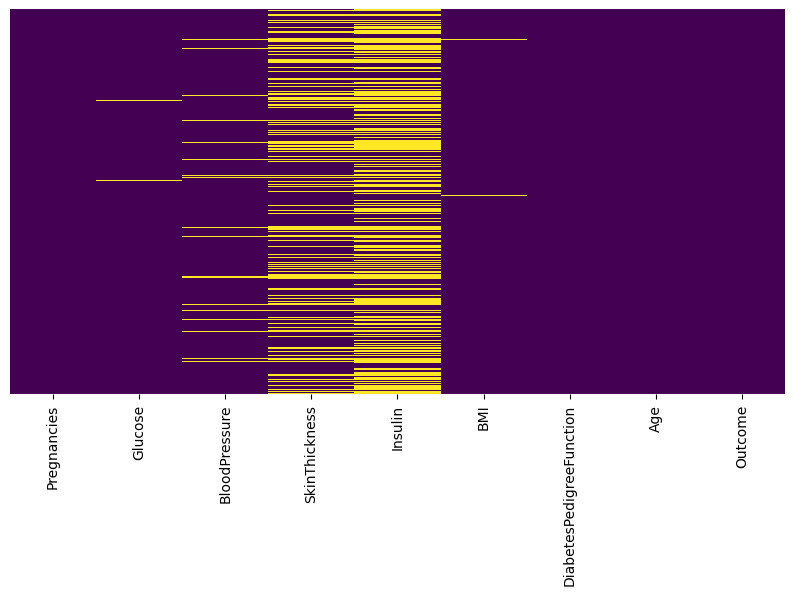

In [ ]:
# Start with a heat map of the missing values location in our dataframe
plt.figure(figsize=(10, 5))
sns.heatmap(df_copy.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.show()

**Columns:** Each column in the heatmap corresponds to a column in the DataFrame. The columns are labeled at the bottom: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, and Outcome.

**Rows:** Each row in the heatmap corresponds to a row in the DataFrame.

**Color Coding**:
**Purple:** Indicates the presence of a non-missing value (a **valid entry**) in that particular cell of the DataFrame.
**Yellow:** Represents a missing value (**NaN**) in the corresponding cell of the DataFrame.

The Pregnancies, DiabetesPedigreeFunction, Age, and Outcome columns are predominantly purple, suggesting that there are very few or no missing values in these columns.

The columns Glucose, BloodPressure, SkinThickness, Insulin, and BMI have yellow streaks, indicating rows where the values are missing.

Among them:

**SkinThickness and Insulin columns seem to have a higher proportion of missing values, as indicated by the dense yellow streaks.**
Glucose, BloodPressure, and BMI also have missing values, but they seem to be fewer in comparison to SkinThickness and Insulin.

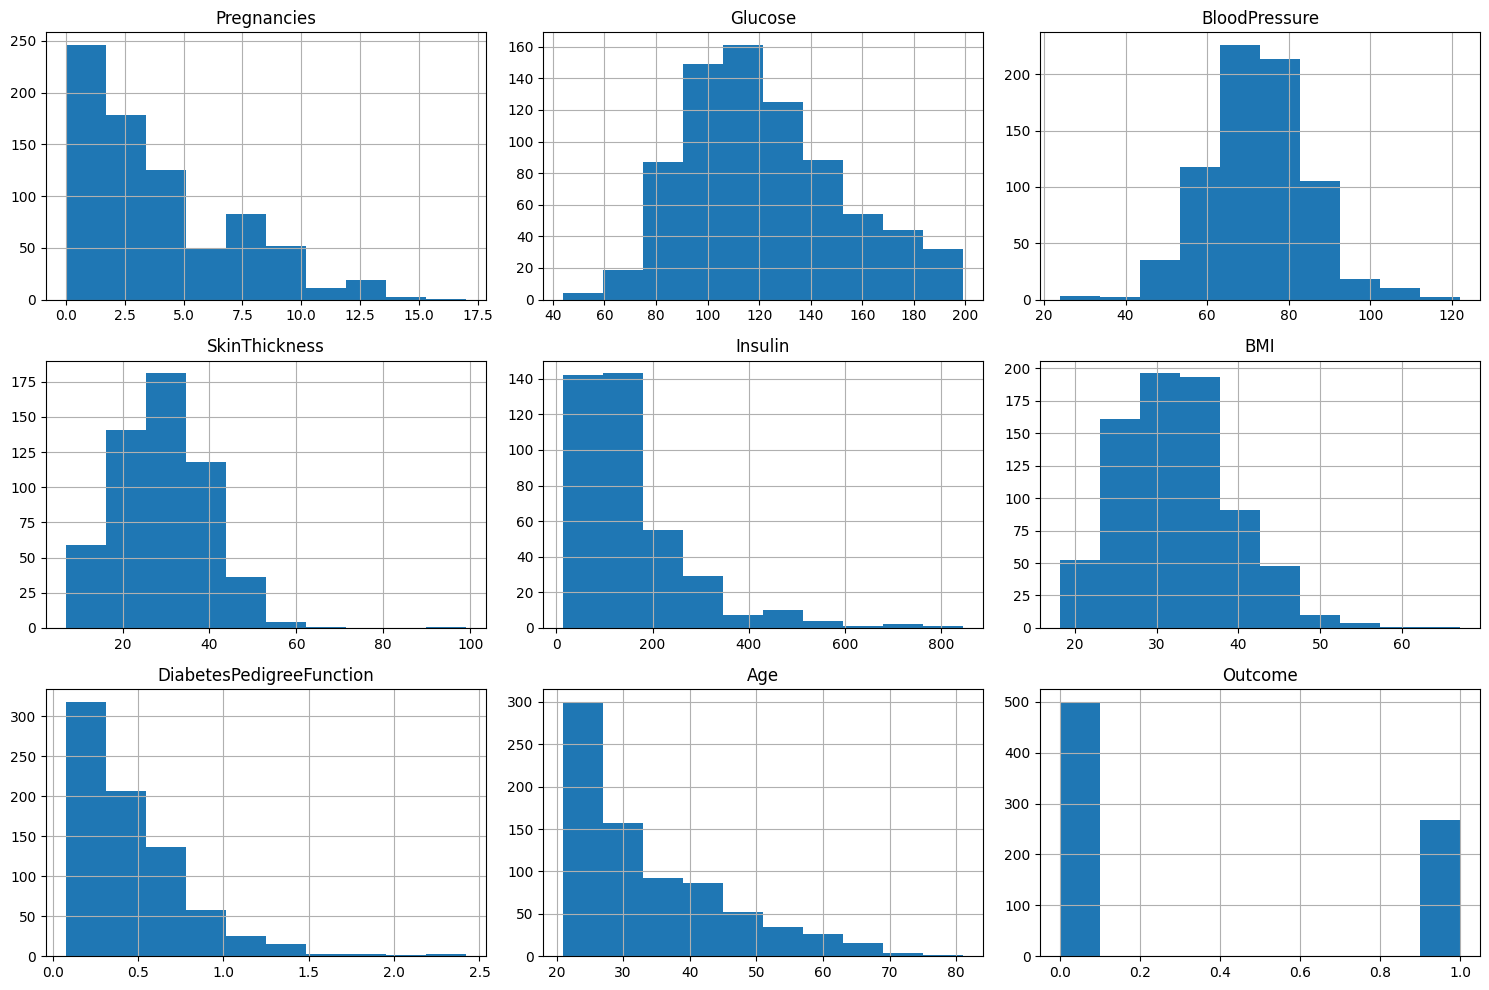

In [ ]:
# Plotting histograms for the features in our dataframe

df_copy.hist(figsize= (15,10))
plt.tight_layout()
plt.show()

**Pregnancies:**
The majority of individuals in this dataset have had between 0 and 2.5 pregnancies. The frequency decreases as the number of pregnancies increases, indicating fewer individuals have had a high number of pregnancies.

**Glucose:** The distribution appears somewhat bell-shaped, with a peak around a glucose level of 100 to 120.
There are fewer individuals with very low or very high glucose levels, indicating that most fall within a moderate range.

**BloodPressure:** The distribution is approximately bell-shaped and centered around 60 to 80.
This suggests that most individuals have blood pressure values within the normal to slightly elevated range.

**SkinThickness:** The majority of individuals have skin thickness measurements between 20 to 40.
There's a drop in frequency as the skin thickness increases beyond 40.

**Insulin:** A significant number of individuals have low insulin levels (close to 0).
The frequency decreases sharply as the insulin level increases, indicating that very high insulin levels are less common.

**BMI (Body Mass Index):** The distribution is roughly bell-shaped, peaking around 30 to 40.
This suggests that many individuals in the dataset are in the overweight to obese range (a BMI of 25 to 29.9 is considered overweight, and a BMI of 30 or higher is considered obese).

**DiabetesPedigreeFunction:** Most individuals have a value less than 1 for the diabetes pedigree function.
The frequency decreases rapidly for higher values, indicating that high pedigree function scores are less common.

**Age:** The majority of individuals are between the ages of 20 and 30.
The number of individuals decreases as age increases, indicating that there are fewer older individuals in the dataset.

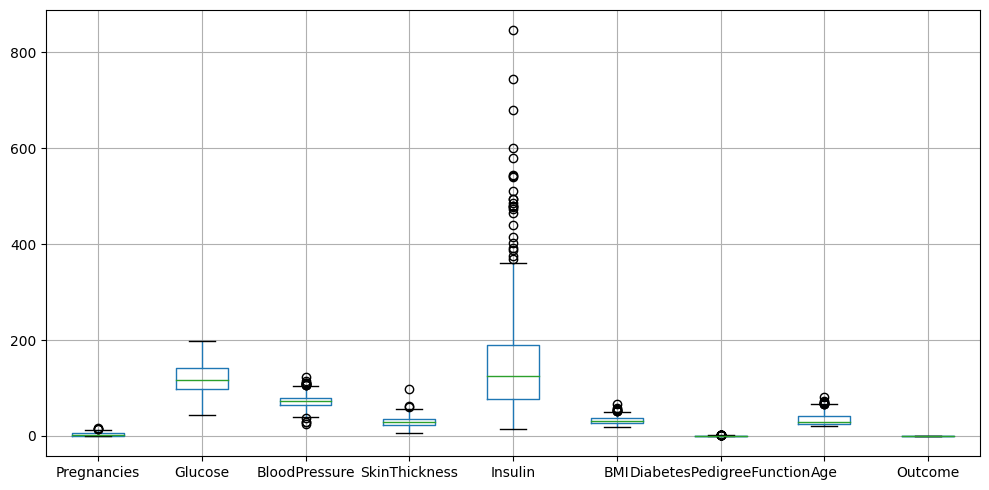

In [ ]:
# Boxplot for outliers
df_copy.boxplot(figsize=(10, 5))
plt.tight_layout()
plt.show()

**Pregnancies:** Most individuals have had a few pregnancies, with some outliers indicating a higher number of pregnancies.

**Glucose:** The majority of the data is towards the higher glucose levels, with some lower outliers.

**BloodPressure:** Data is evenly distributed with a central median; outliers are present on both the lower and higher ends.

**SkinThickness:** Predominantly lower skin thickness measurements with numerous outliers towards the higher end.

**Insulin:** Most individuals have lower insulin levels, but there's a significant number with extremely high insulin levels, as indicated by the many outliers.

**BMI:** Data is fairly symmetric, with outliers on both the lower and higher ends.

**DiabetesPedigreeFunction:** Majority have low values, with several higher-end outliers.

**Age:** The dataset skews towards younger individuals, with outliers representing older ages.

**Outcome:** More individuals have an outcome of 0 than 1.

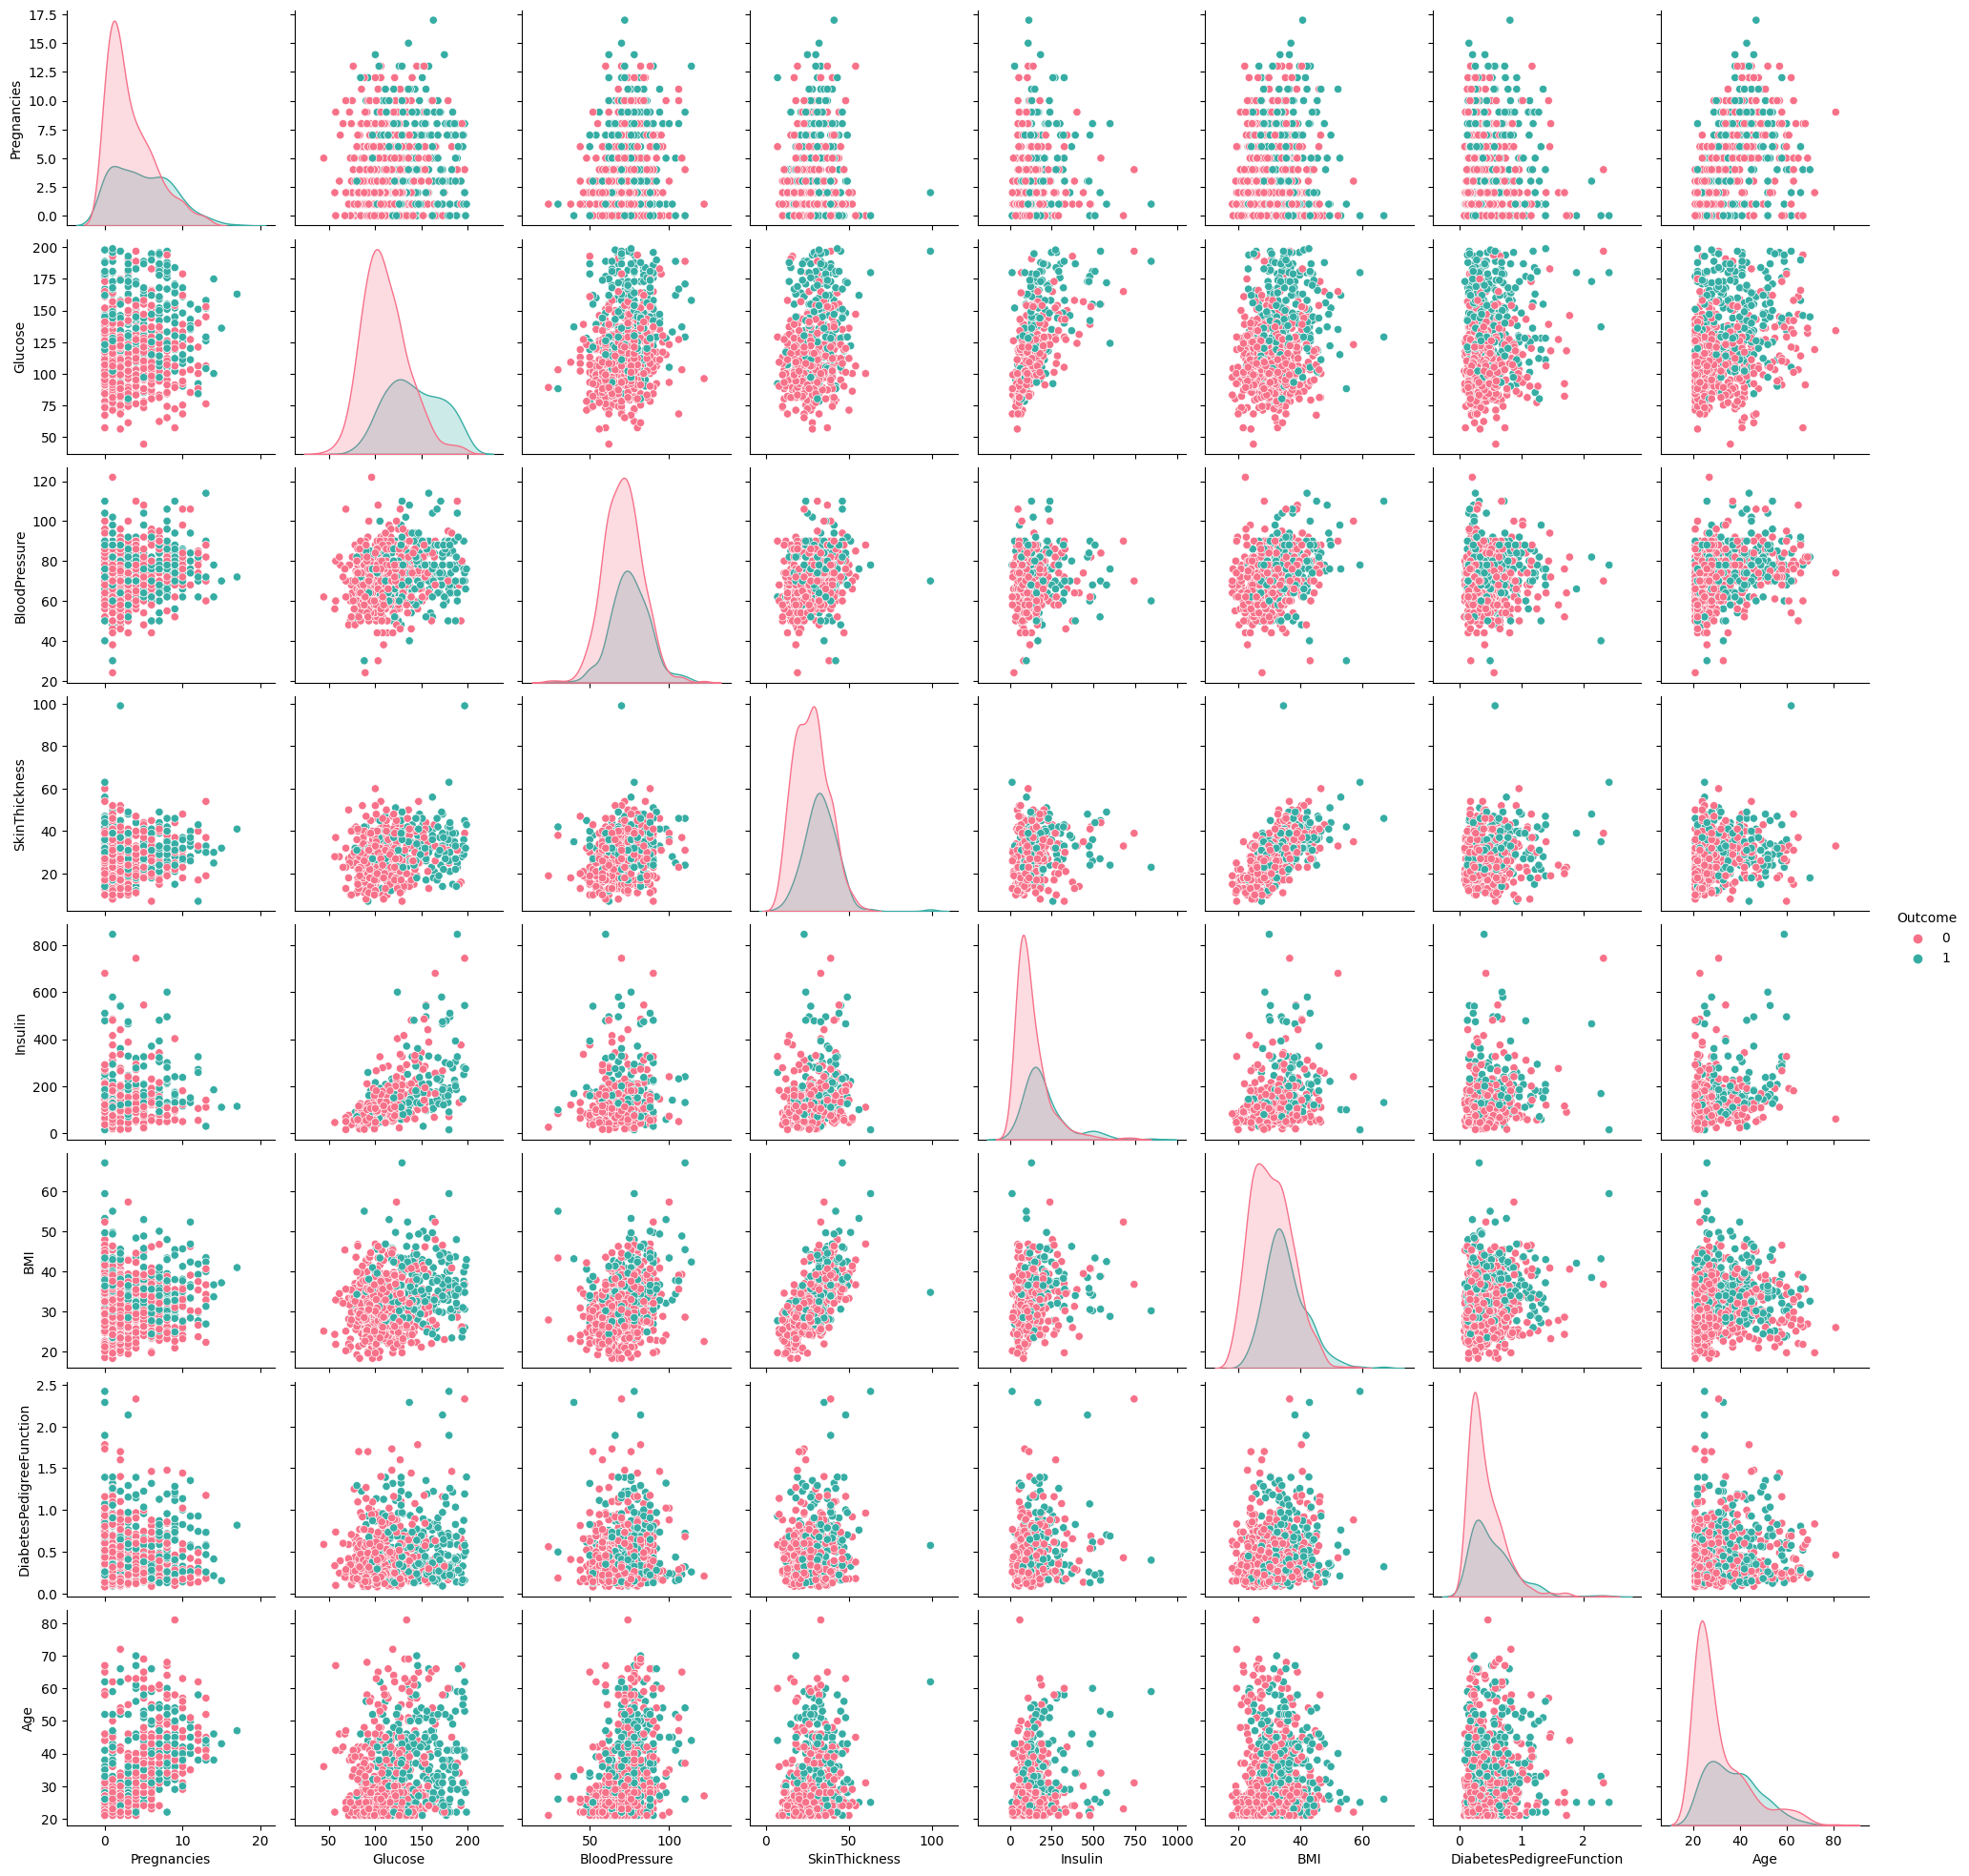

In [ ]:
# A pairplot to look at the relationship between multiple columns
sns.pairplot(df_copy, hue="Outcome", palette="husl")
plt.show()

**Features Displayed:** The plot contains multiple variables such as 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', and 'Age'. The 'Outcome' is color-coded: points in red indicate an outcome of '1', and those in green/blue represent an outcome of '0'.

**Histograms on the Diagonal:**
The histogram for '**Pregnancies**' displays a right-skewed distribution, indicating that most individuals have a lower number of pregnancies.
'**Glucose**' seems to have a slightly left-skewed distribution.
**'BloodPressure', 'SkinThickness', and 'BMI'** appear to have roughly normal (bell-shaped) distributions, though there might be some outliers.
'**Insulin**' is right-skewed with some extreme values on the higher end.
'**DiabetesPedigreeFunction**' is also right-skewed.
'**Age**' shows a right-skewed distribution, suggesting a younger population.

**Scatter Plots Off the Diagonal**:

The scatter plot between 'Glucose' and 'Outcome' shows a trend where higher glucose levels correspond to an outcome of '1'. This indicates a potential correlation between glucose levels and diabetes outcome.
'Age' vs 'Pregnancies': As expected, there seems to be a positive correlation; older individuals tend to have had more pregnancies.
'Insulin' vs 'Glucose' shows some clustering. Higher glucose levels often correspond with higher insulin levels, indicating a potential relationship.
Most other scatter plots show a more dispersed distribution without a clear linear relationship.


**Colored Data Points:**
In almost all scatter plots, red points (Outcome '1') tend to be higher on both axes compared to green/blue points (Outcome '0'). This suggests that higher values of these features might be related to the outcome of diabetes being positive.
The 'Outcome' row/column in the plot shows the separation between the two categories for each feature. For example, higher 'Glucose' values predominantly result in a positive outcome (red points).

**Potential Outliers:**'Insulin' vs other features: There are a few points with extremely high insulin levels. These could be outliers or potential data entry errors.
Similarly, the plots involving 'SkinThickness' and 'BloodPressure' have points that might be considered outliers.


**Data Density:**Some scatter plots like 'BMI' vs 'BloodPressure' show a dense clustering of points in the center, indicating that most of the data is concentrated around average BMI and BloodPressure values.


**Limitations:**
While visual trends can be observed, the plots don't give exact correlation values. Statistical tests would be needed for a more rigorous evaluation.
Some features don't show a clear distinction between the outcomes, meaning they might not be as influential on their own for predicting the outcome.

**To understand the coorelation a little better let's plot a coorealtion matrix heat map of dataframe**

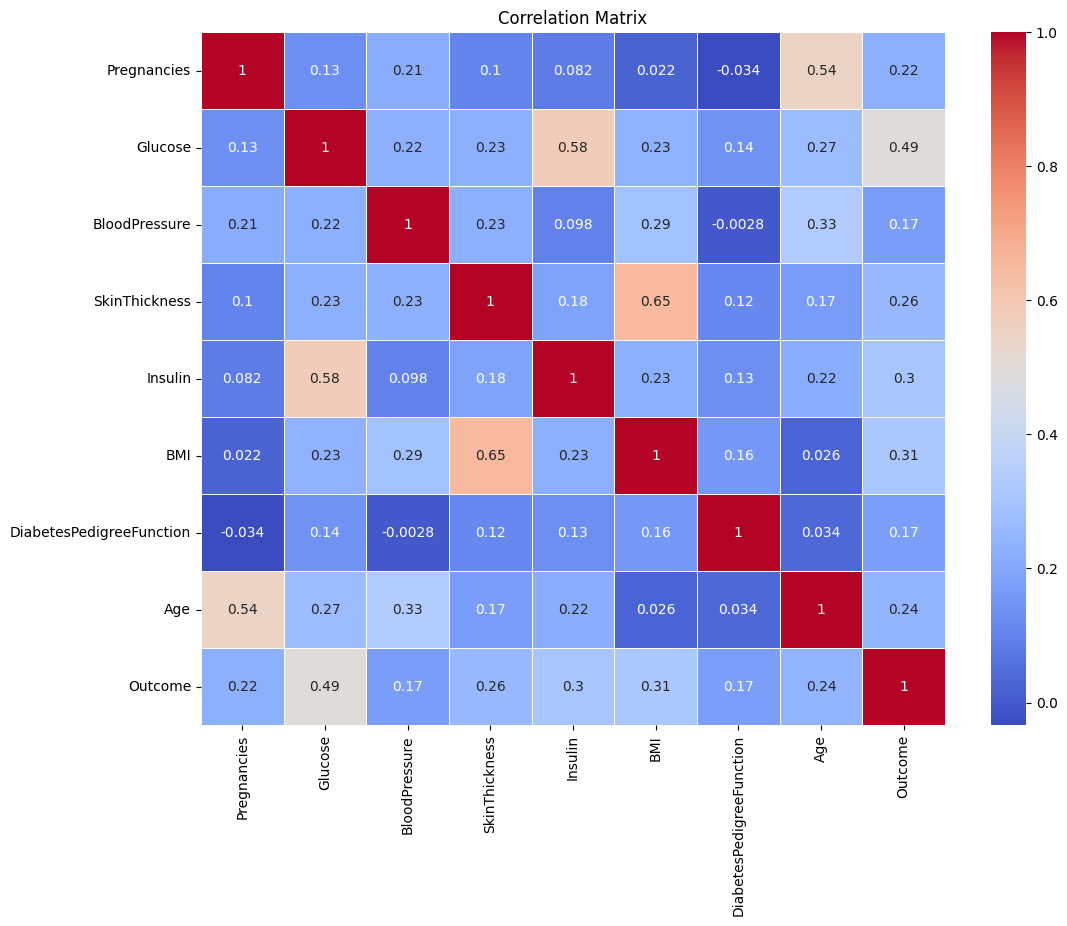

In [ ]:
correlation_matrix = df_copy.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Color Scheme:**

The color scale on the right side of the heatmap goes from -0.2 (blue) to 1.0 (red).
Red squares indicate positive correlations, blue squares indicate negative correlations, and colors that are closer to white indicate weaker correlations (values closer to 0).

**Noteworthy Correlations:**

**Glucose & Outcome (0.49):** There is a moderate positive correlation between glucose levels and the diabetes outcome. This suggests that higher glucose levels are associated with a higher likelihood of diabetes.


**Age & Pregnancies (0.54)**: There is a moderate positive correlation between age and the number of pregnancies. This is logical, as older individuals have had more time to have pregnancies.


**BMI & SkinThickness (0.65)**: A moderate to strong positive correlation exists between BMI and skin thickness. This may imply that as BMI increases, skin thickness also tends to increase.


**Insulin & Glucose (0.58):** There's a moderate positive correlation between insulin levels and glucose levels. This suggests that higher glucose levels might be associated with higher insulin levels.

***NOTE: Correlation does not imply causation. Just because two variables are correlated does not mean that changes in one variable cause changes in another.***

**Now that we have a general understanging of the data distribution in our dataframe, it's time to handle the NaN values and compare the various matrices with the dataframe with NaN values.**

The choice of how to replace the NaN (missing) values in the columns 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', and 'BMI' should be guided by the characteristics of the data.

**Glucose, BMI and Blood Pressure:**

The distribution of 'Glucose', 'BMI' and 'BloodPressure' appears roughly normal.
We can consider replacing the missing values with the **mean ('average')** value of the column, as it's a common choice for normally distributed data.

**Skin Thickness and Insulin:**

Both exhibit a positive skewed distribution with insuln having many outliers. The most appropriate is to impute the NaN with the '**median'** as it is robust to outliers and aligns with the data ditribution.

In [ ]:
# Imputing the NaN
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].mean(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].mean(), inplace = True)

df_copy.head(20)

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin        BMI  \
0             6    148.0      72.000000       35.00000  155.548223  33.600000   
1             1     85.0      66.000000       29.00000  155.548223  26.600000   
2             8    183.0      64.000000       29.15342  155.548223  23.300000   
3             1     89.0      66.000000       23.00000   94.000000  28.100000   
4             0    137.0      40.000000       35.00000  168.000000  43.100000   
5             5    116.0      74.000000       29.15342  155.548223  25.600000   
6             3     78.0      50.000000       32.00000   88.000000  31.000000   
7            10    115.0      72.405184       29.15342  155.548223  35.300000   
8             2    197.0      70.000000       45.00000  543.000000  30.500000   
9             8    125.0      96.000000       29.15342  155.548223  32.457464   
10            4    110.0      92.000000       29.15342  155.548223  37.600000   
11           10    168.0      74.000000       29.15342  155.548223  38.000000   
12           10    139.0      80.000000       29.15342  155.548223  27.100000   
13            1    189.0      60.000000       23.00000  846.000000  30.100000   
14            5    166.0      72.000000       19.00000  175.000000  25.800000   
15            7    100.0      72.405184       29.15342  155.548223  30.000000   
16            0    118.0      84.000000       47.00000  230.000000  45.800000   
17            7    107.0      74.000000       29.15342  155.548223  29.600000   
18            1    103.0      30.000000       38.00000   83.000000  43.300000   
19            1    115.0      70.000000       30.00000   96.000000  34.600000   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
1                      0.351   31        0  
2                      0.672   32        1  
3                      0.167   21        0  
4                      2.288   33        1  
5                      0.201   30        0  
6                      0.248   26        1  
7                      0.134   29        0  
8                      0.158   53        1  
9                      0.232   54        1  
10                     0.191   30        0  
11                     0.537   34        1  
12                     1.441   57        0  
13                     0.398   59        1  
14                     0.587   51        1  
15                     0.484   32        1  
16                     0.551   31        1  
17                     0.254   31        1  
18                     0.183   33        0  
19                     0.529   32        1

**Plotting after NaN removal**

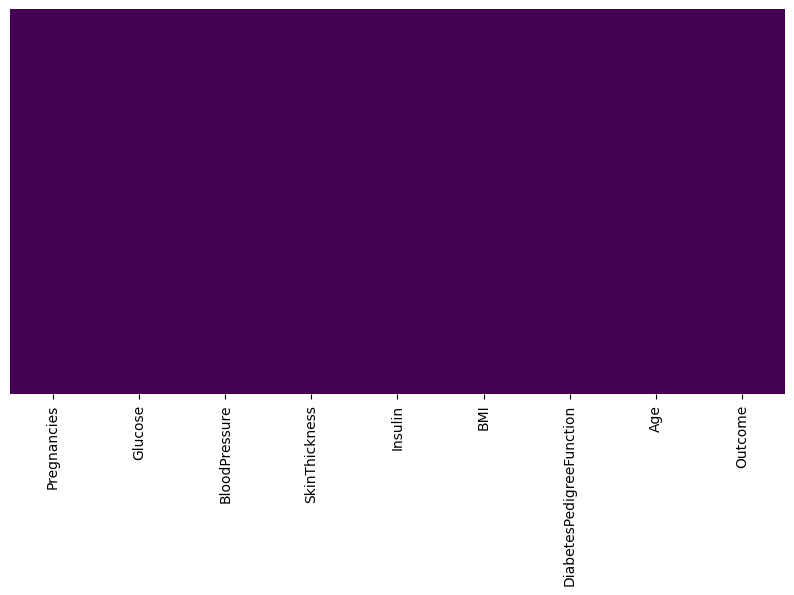

In [ ]:
# Heat map for the NaN values, will be completely purple because of no NaN values
plt.figure(figsize=(10, 5))
sns.heatmap(df_copy.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.show()

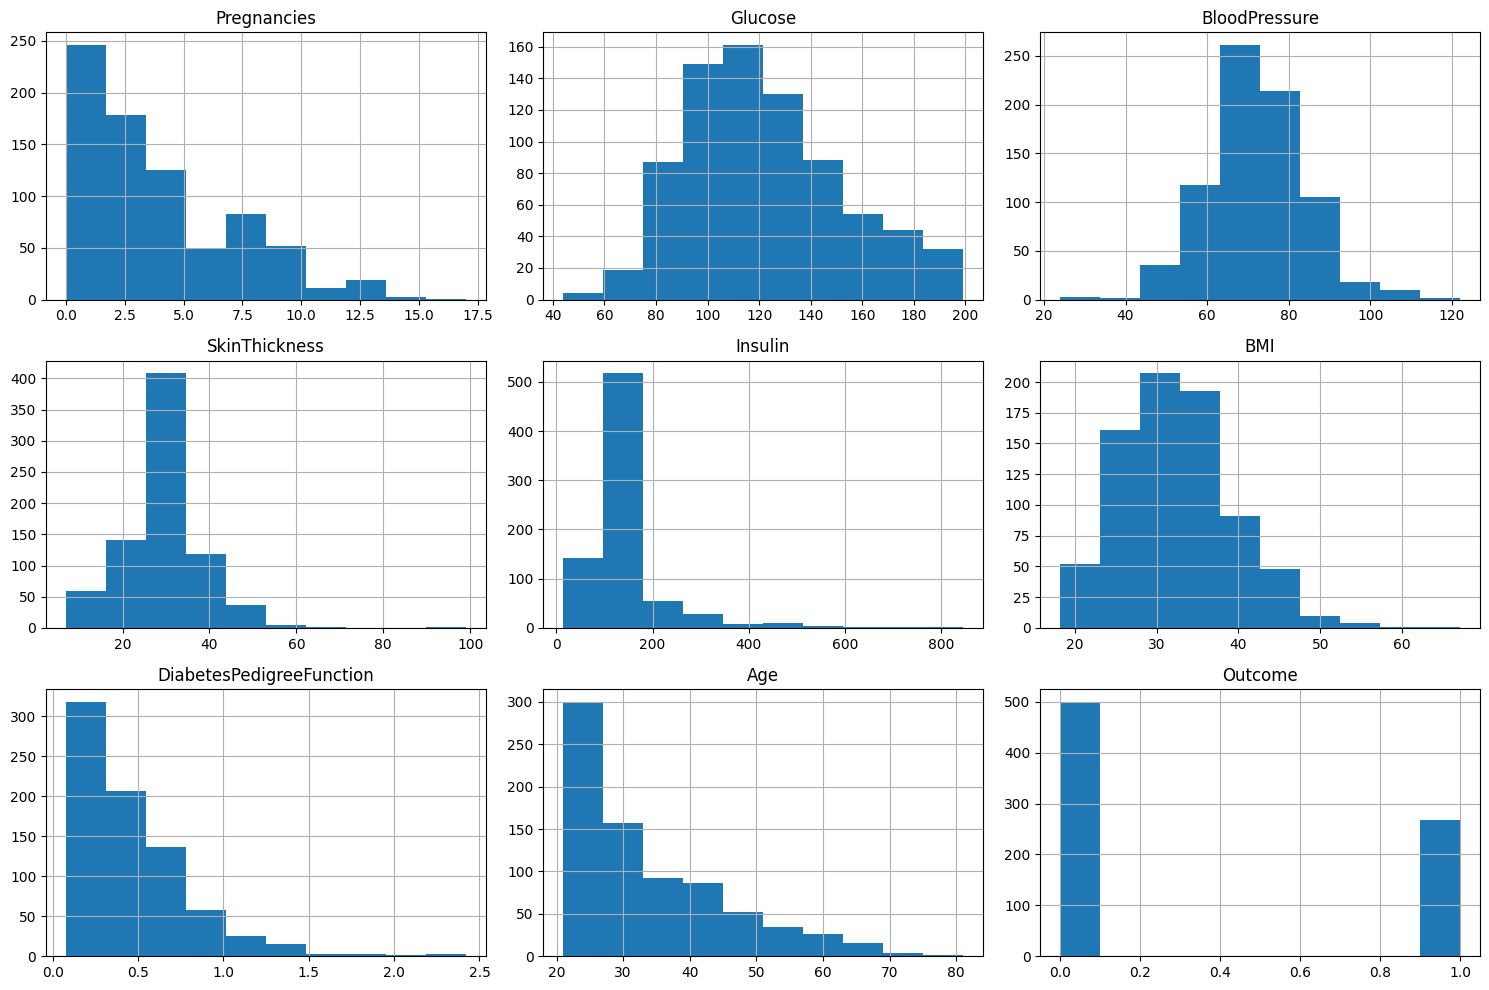

In [ ]:
# Plotting histograms for the features after imputing NaN

df_copy.hist(figsize= (15,10))
plt.tight_layout()
plt.show()

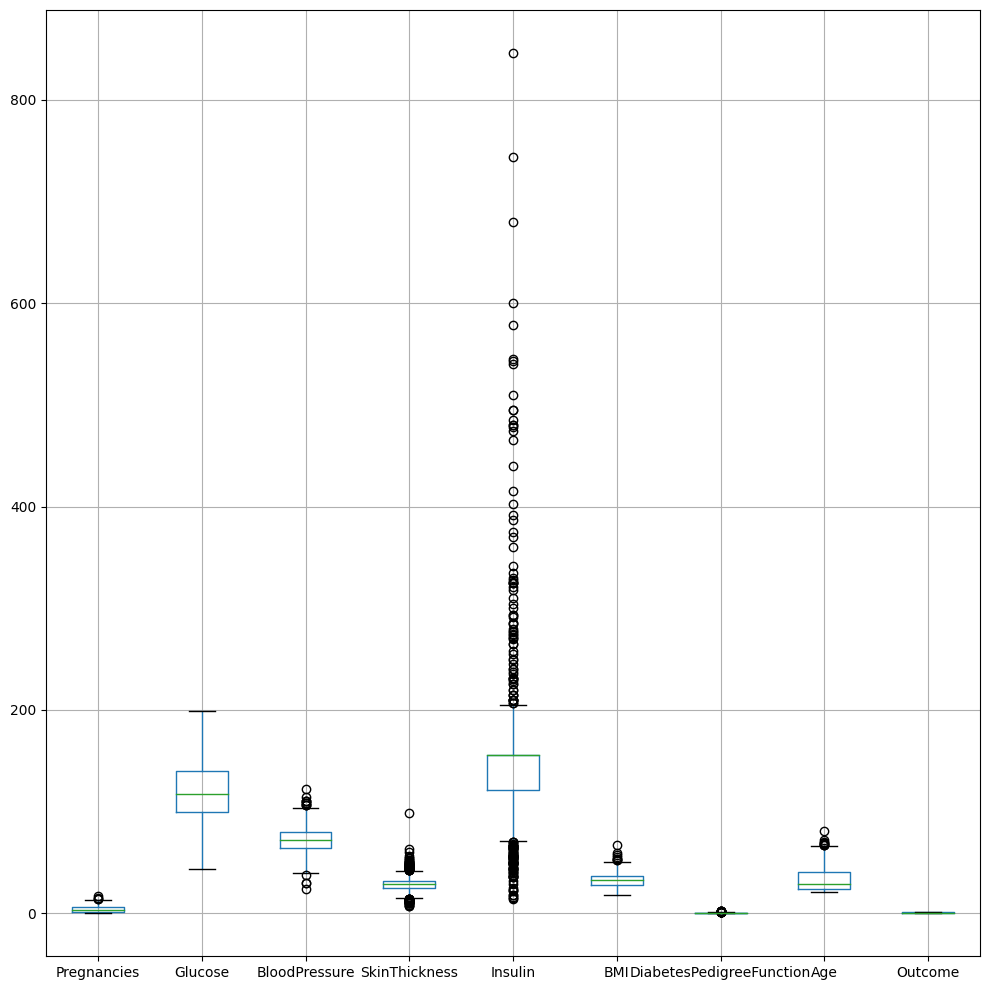

In [ ]:
# Boxplot
df_copy.boxplot(figsize=(10, 10))
plt.tight_layout()
plt.show()

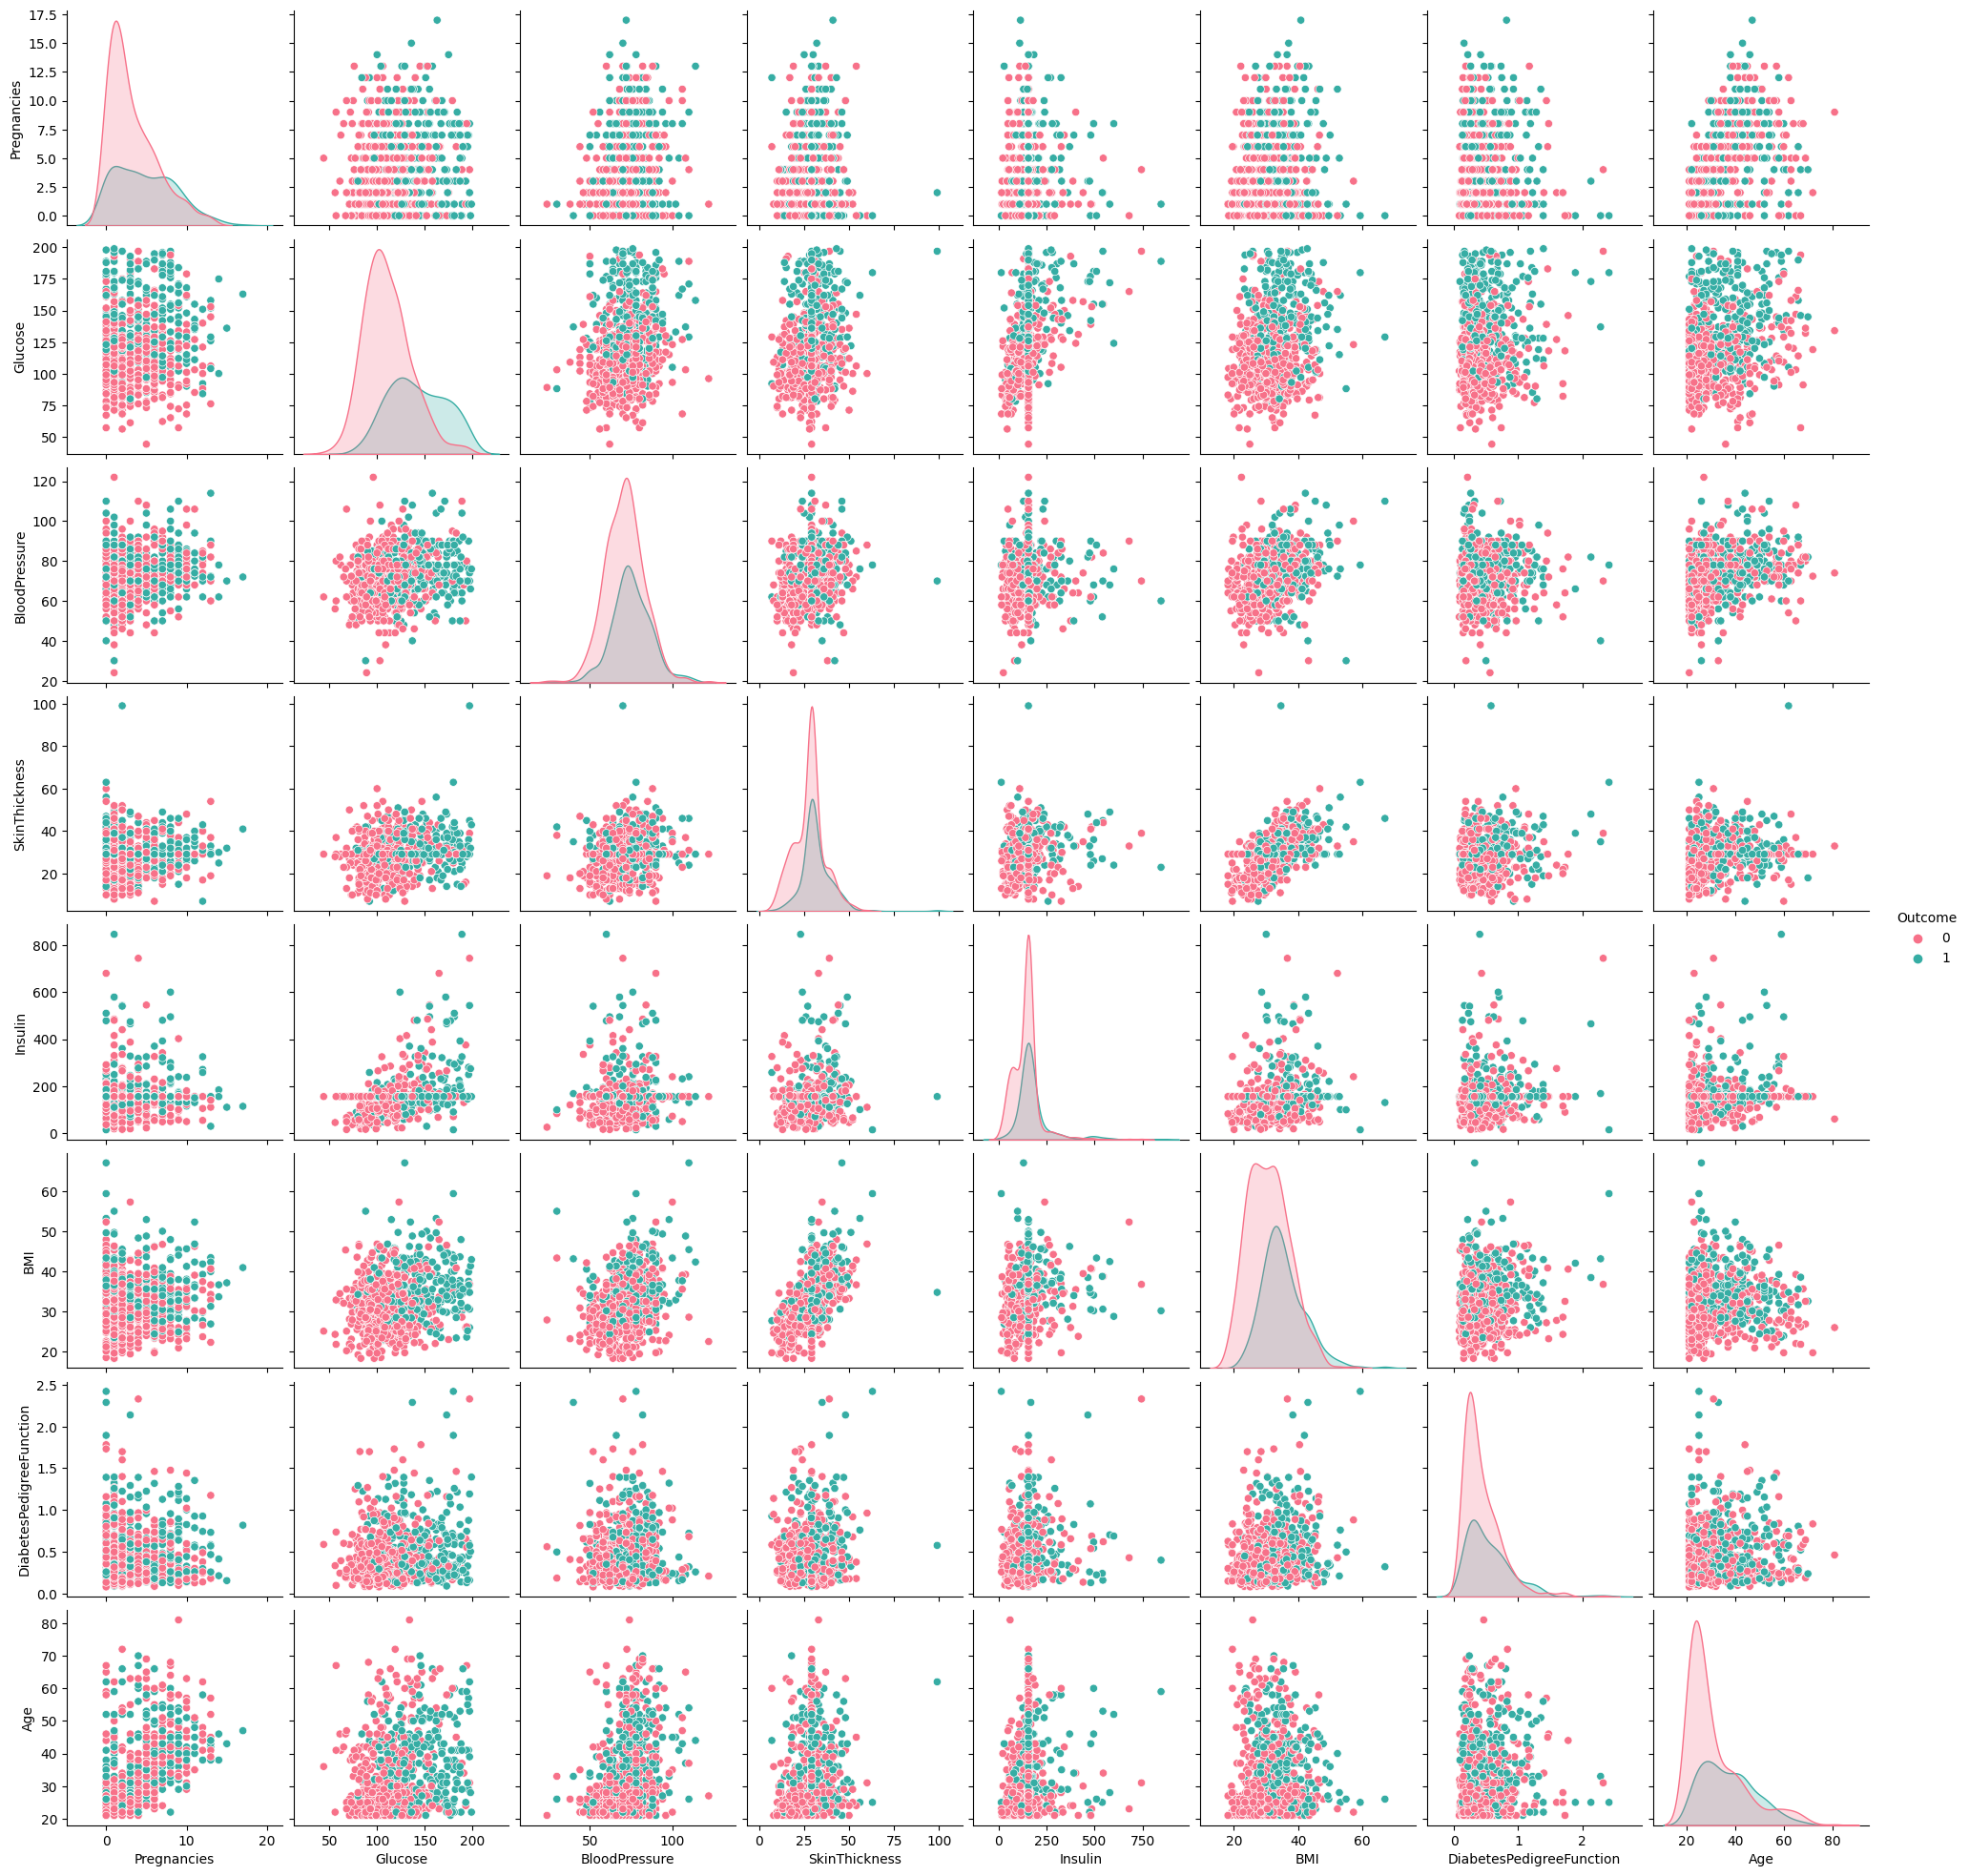

In [ ]:
# Pairplot of the imputed dataframe
sns.pairplot(df_copy, hue="Outcome", palette="husl")
plt.show()

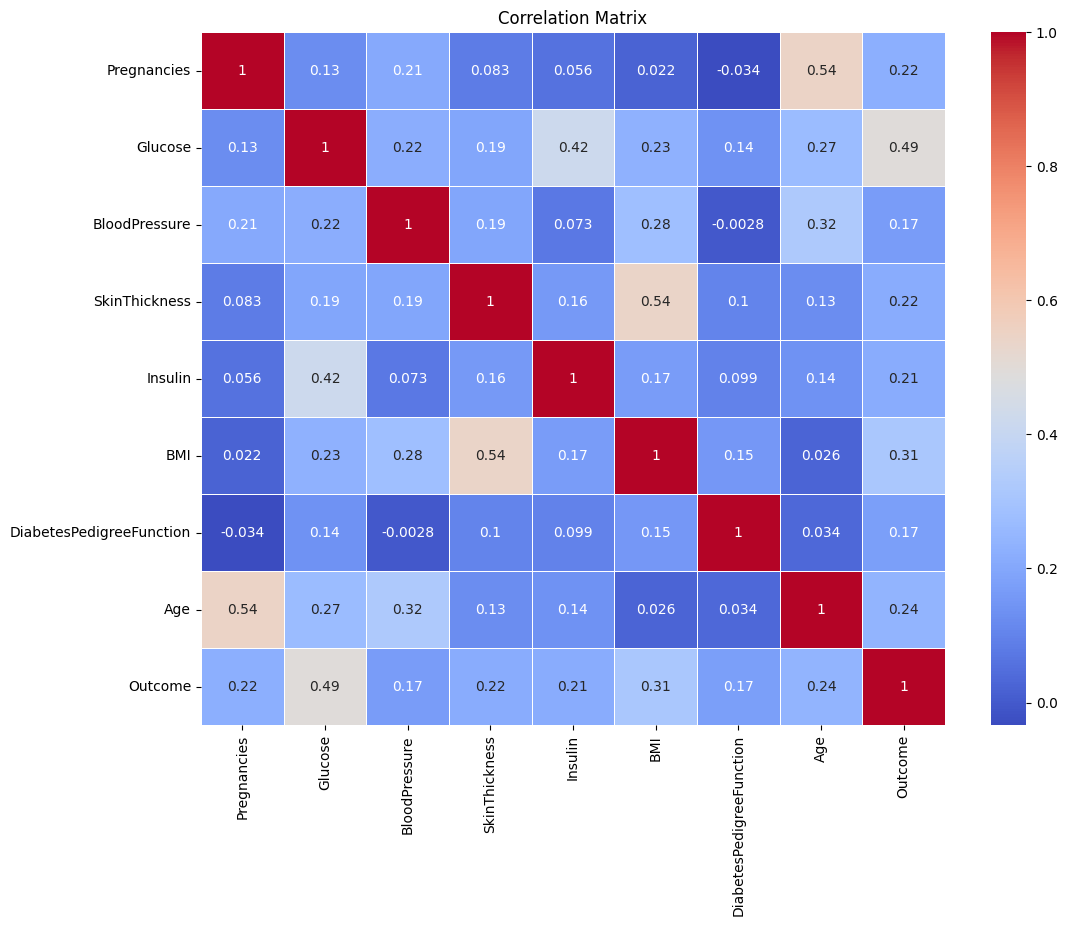

In [ ]:
# coorelation matrix for the imputed dataframe
corr_matrix = df_copy.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for df_copy: 0.7489177489177489
Precision for df_copy: 0.6153846153846154
Recall df_copy: 0.547945205479452
F1-Score for df_copy: 0.5797101449275363


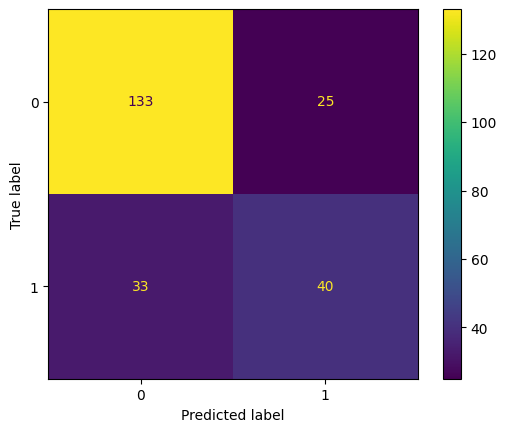

In [ ]:
# let's see the confusion matrix again with the modified dataframe and the original df side by side

# modified df_copy
cm_copy = score_data(df_copy)
disp = ConfusionMatrixDisplay(cm_copy)
disp.plot()


TP = cm_copy[1, 1]
TN = cm_copy[0, 0]
FP = cm_copy[0, 1]
FN = cm_copy[1, 0]

# Calculate Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate Precision
precision = TP / (TP + FP)

# Calculate Recall (Sensitivity)
recall = TP / (TP + FN)

# Calculate F1-Score
f1 = 2*((precision*recall)/(precision+recall))

# Print the metrics
print("Accuracy for df_copy:", accuracy)
print("Precision for df_copy:", precision)
print("Recall df_copy:", recall)
print("F1-Score for df_copy:", f1)



**Accuracy for df:** 0.7748917748917749

**Accuracy for df_copy**: 0.7489177489177489

**Precision for df**: 0.6615384615384615

**Precision for df_copy:** 0.6153846153846154

**Recall for df**: 0.589041095890411

**Recall df_copy:** 0.547945205479452

**F1-Score for df**: 0.6231884057971014

**F1-Score for df_copy:** 0.5797101449275363


As we can se **after handeling the zero values** there was a **drop in accuracy** and F1 score

**Let's try Scaling method:**

It is a preprocessing technique used to standardize or normalize the features (independent variables) of a dataset. It ensures that all features have a similar scale or range.

Two common scaling methods are Min-Max scaling and z-score (standardization) scaling:

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#let's make seperate copies of the df_copy dataframe so we can compare both the scaling techniques
df_minmax = df_copy.copy(deep = True)
df_standard = df_copy.copy(deep = True)

# Creating a minmax scaler
scaler_minmax = MinMaxScaler()
columns_to_scale = [col for col in df_minmax.columns if col != 'Outcome']
df_minmax[columns_to_scale] = scaler_minmax.fit_transform(df_minmax[columns_to_scale])

df_minmax.head(5)

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.670968       0.489796       0.304348  0.170130  0.314928   
1     0.058824  0.264516       0.428571       0.239130  0.170130  0.171779   
2     0.470588  0.896774       0.408163       0.240798  0.170130  0.104294   
3     0.058824  0.290323       0.428571       0.173913  0.096154  0.202454   
4     0.000000  0.600000       0.163265       0.304348  0.185096  0.509202   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333        1  
1                  0.116567  0.166667        0  
2                  0.253629  0.183333        1  
3                  0.038002  0.000000        0  
4                  0.943638  0.200000        1

Accuracy for df_minmax: 0.7575757575757576
Precision for df_minmax: 0.6268656716417911
Recall df_minmax: 0.5753424657534246
F1-Score for df_minmax: 0.6


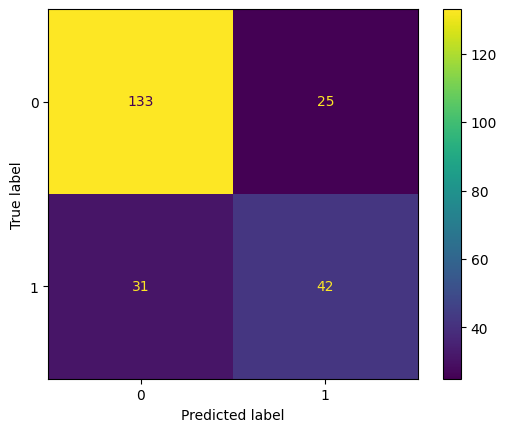

In [ ]:
# lets compute the confusion matrix for minmax scaler dataframe and check the accuracy
cm_minmax = score_data(df_minmax)
disp = ConfusionMatrixDisplay(cm_minmax)
disp.plot()


TP = cm_minmax[1, 1]
TN = cm_minmax[0, 0]
FP = cm_minmax[0, 1]
FN = cm_minmax[1, 0]

# Calculate Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate Precision
precision = TP / (TP + FP)

# Calculate Recall (Sensitivity)
recall = TP / (TP + FN)

# Calculate F1-Score
f1 = 2*((precision*recall)/(precision+recall))

# Print the metrics
print("Accuracy for df_minmax:", accuracy)
print("Precision for df_minmax:", precision)
print("Recall df_minmax:", recall)
print("F1-Score for df_minmax:", f1)


After minman scaling there was a **minor increase of 1%** in the accuracy

**Accuracy for df_minmax: 0.7575757575757576**

Accuracy for df_copy: 0.7489177489177489

In [ ]:
# creating Z-score scaler
scaler_standard = StandardScaler()
columns_to_scale = [col for col in df_standard.columns if col != 'Outcome']
df_standard[columns_to_scale] = scaler_standard.fit_transform(df_standard[columns_to_scale])

df_standard.head(5)


Pregnancies   Glucose  BloodPressure  SkinThickness       Insulin  \
0     0.639947  0.865108      -0.033518   6.655021e-01 -3.345079e-16   
1    -0.844885 -1.206162      -0.529859  -1.746338e-02 -3.345079e-16   
2     1.233880  2.015813      -0.695306   8.087936e-16 -3.345079e-16   
3    -0.844885 -1.074652      -0.529859  -7.004289e-01 -7.243887e-01   
4    -1.141852  0.503458      -2.680669   6.655021e-01  1.465506e-01   

        BMI  DiabetesPedigreeFunction       Age  Outcome  
0  0.166292                  0.468492  1.425995        1  
1 -0.852531                 -0.365061 -0.190672        0  
2 -1.332833                  0.604397 -0.105584        1  
3 -0.634212                 -0.920763 -1.041549        0  
4  1.548980                  5.484909 -0.020496        1

Accuracy for df_standard: 0.7662337662337663
Precision for df_standard: 0.6417910447761194
Recall df_standard: 0.589041095890411
F1-Score for df_standard: 0.6142857142857142


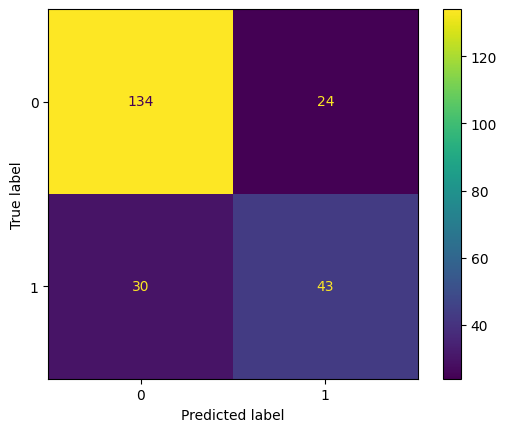

In [ ]:
# Now computing the confusion matrix for standard scaling
cm_standard = score_data(df_standard)
disp = ConfusionMatrixDisplay(cm_standard)
disp.plot()


TP = cm_standard[1, 1]
TN = cm_standard[0, 0]
FP = cm_standard[0, 1]
FN = cm_standard[1, 0]

# Calculate Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate Precision
precision = TP / (TP + FP)

# Calculate Recall (Sensitivity)
recall = TP / (TP + FN)

# Calculate F1-Score
f1 = 2*((precision*recall)/(precision+recall))

# Print the metrics
print("Accuracy for df_standard:", accuracy)
print("Precision for df_standard:", precision)
print("Recall df_standard:", recall)
print("F1-Score for df_standard:", f1)

There was even more increase in accuracy after standard scaling than minmax scaling

**Accuracy for df_standard: 0.7662337662337663**

Accuracy for df_minmax: 0.7575757575757576

Accuracy for df_copy: 0.7489177489177489

Now let's look at the **outliers** in our dataset and find a way to handle these outlires and see if we can increase our accuracy more.

Let's visualise our outliers with a boxplot on our **df_standard** scaled dataframe

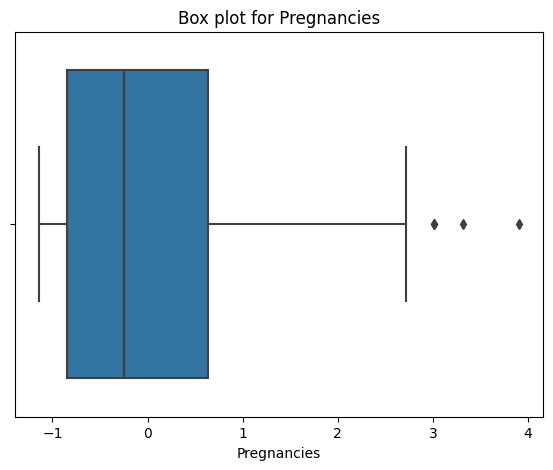

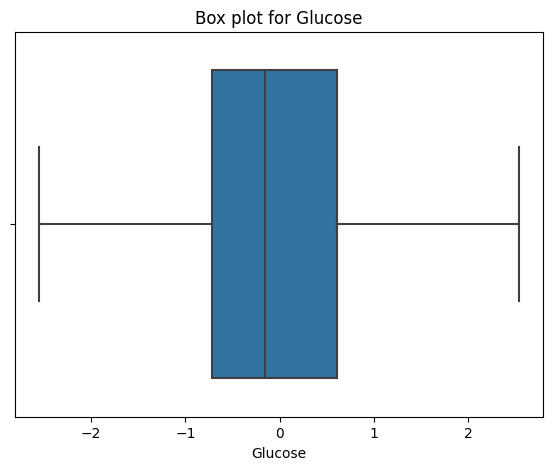

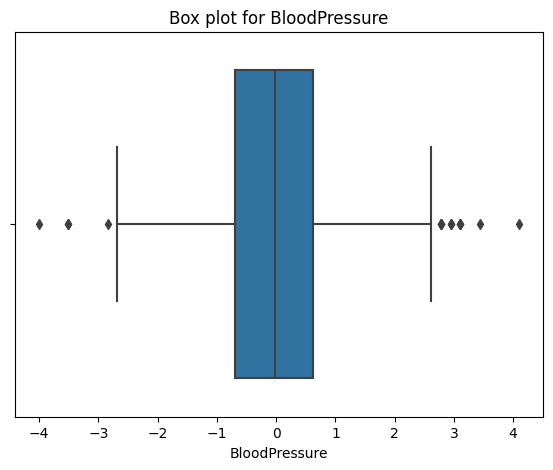

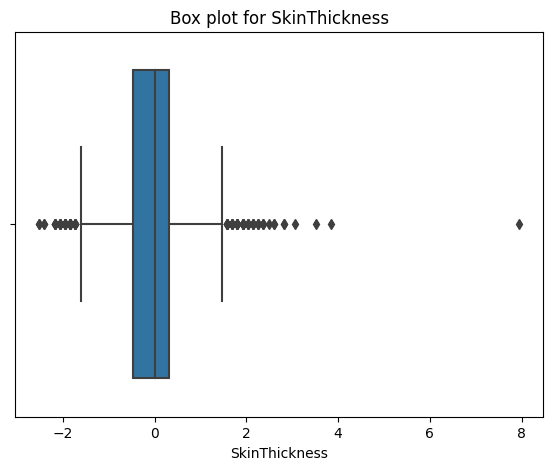

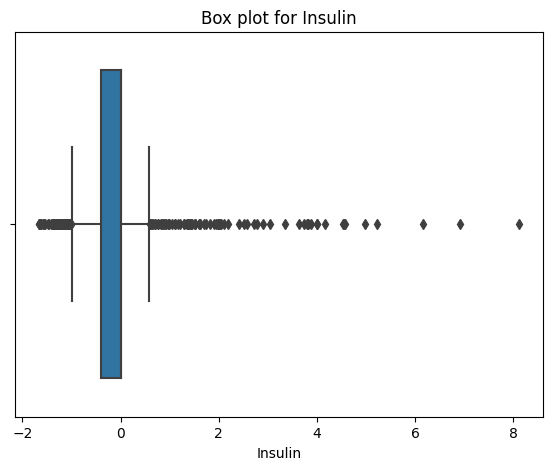

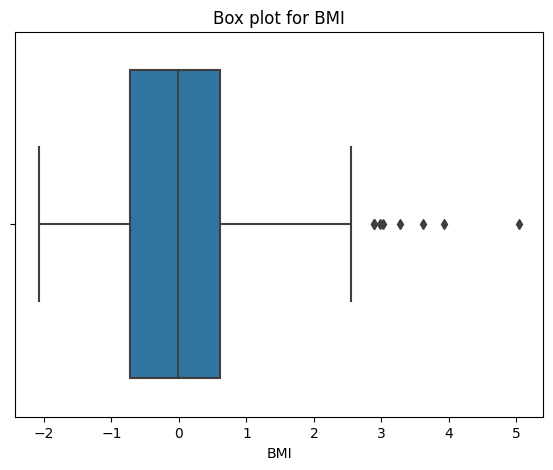

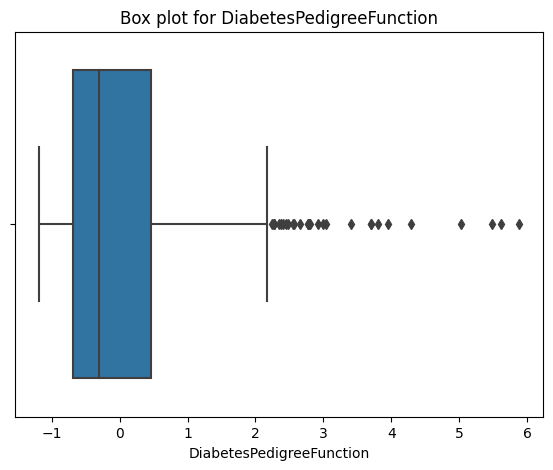

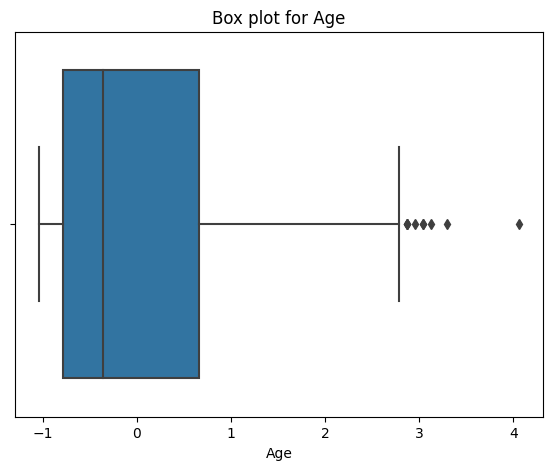

In [ ]:
# Let's create a boxplot for outliers separate for each column
# boxplot for standard scaled dataframe df_standard
for column in df_standard.columns:
  if column != 'Outcome':

    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.boxplot(data = df_standard, x = column)
    plt.title(f'Box plot for {column}')

    plt.show()


**Pregnancies:**
The box plot for "Pregnancies" shows that there are **no outliers**. The data is fairly symmetric and evenly distributed.

**Glucose:**
There are a **few outliers on the lower end** of the distribution.
The data is **positively skewed** (right-skewed), with a longer upper whisker, suggesting some higher values.

**Blood Pressure:**
There are **outliers on both ends** of the distribution.
The data appears to be symmetrically distributed, with a wide range of values.


**Skin Thickness:**
There are **many outliers on the upper end** of the distribution, indicating a presence of extremely high values.
The data is **positively skewed** with a longer upper whisker.


**Insulin:**There are **numerous outliers on the upper end** of the distribution, suggesting extremely high values.
The data is **strongly positively skewed**, with a much longer upper whisker than the lower whisker.


**BMI (Body Mass Index):**
There are **outliers on the lower and upper ends** of the distribution.
The data is **positively skewed**, with a longer upper whisker.


**Diabetes Pedigree Function:**
There are a **few outliers on the lower end** of the distribution.
The data is **positively skewed**, with a longer upper whisker.

**Age:**
There are **outliers on the upper end** of the distribution.
The data appears to be **positively skewed**, with a longer upper whisker.


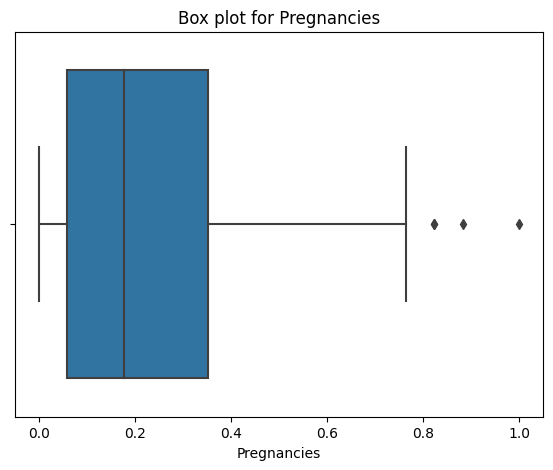

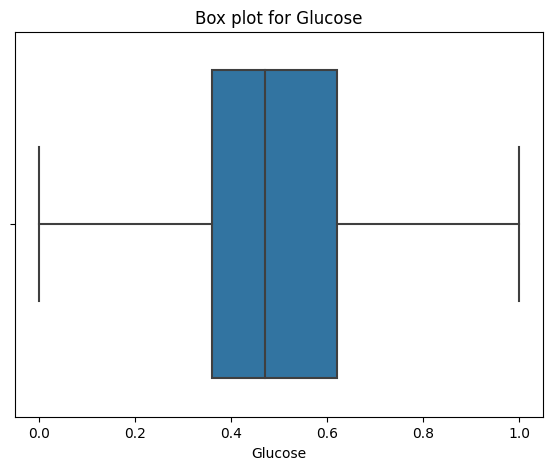

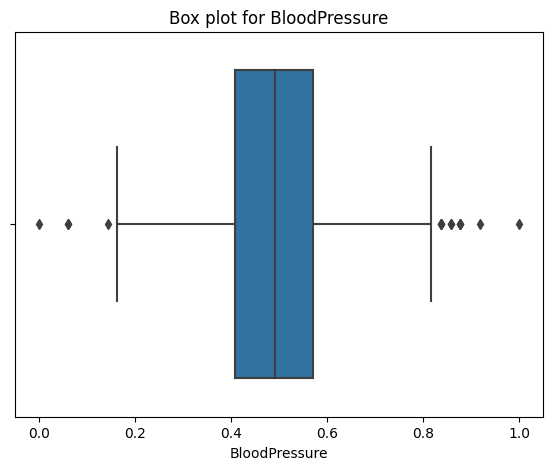

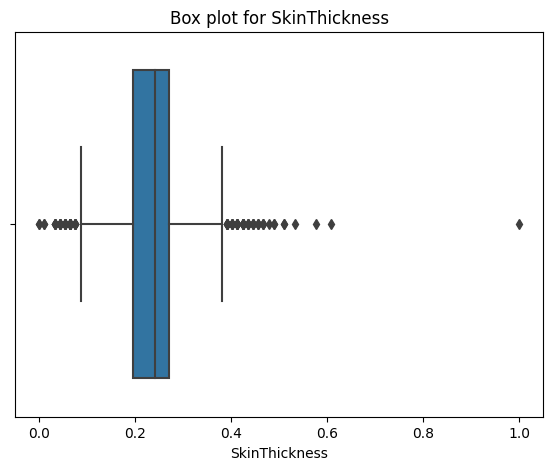

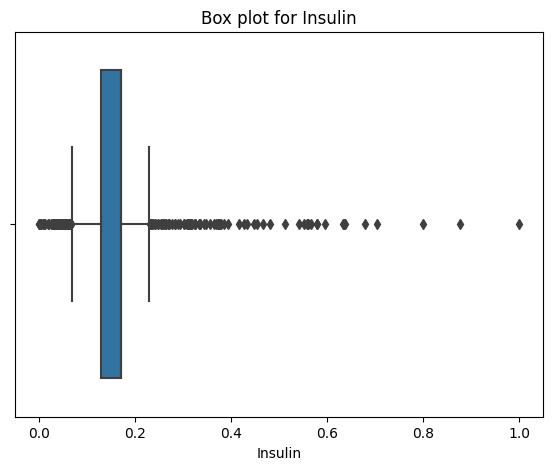

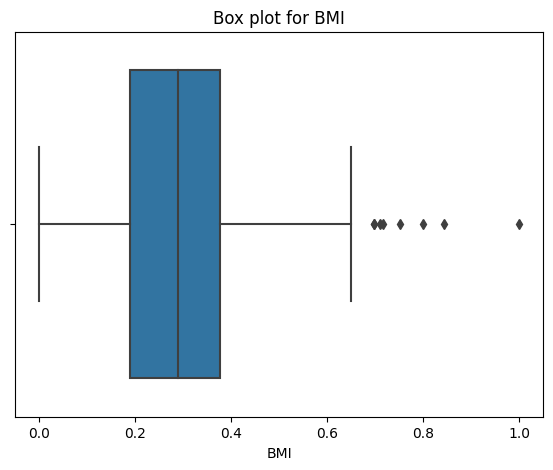

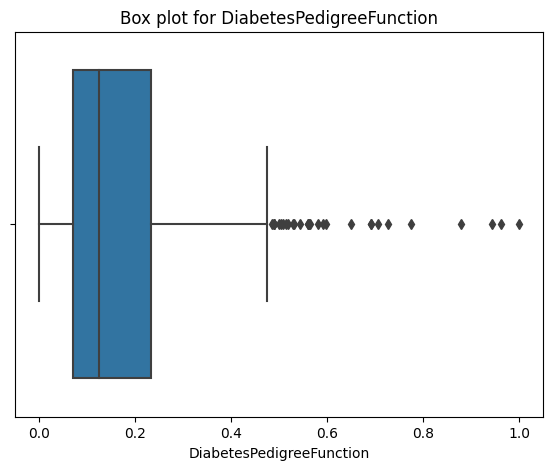

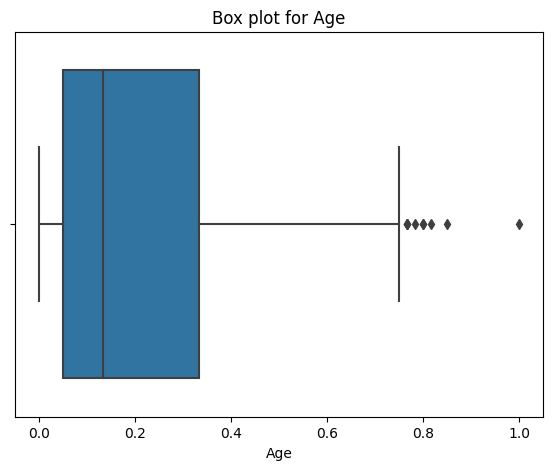

In [ ]:
# boxplot for minmax scaled dataframe df_minmax
for column in df_minmax.columns:
  if column != 'Outcome':

    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.boxplot(data = df_minmax, x = column)
    plt.title(f'Box plot for {column}')

    plt.show()


If we look at the outliers in both the scaled dataframes there is no visible difference.

So, let's handle the outliers in both the dataframes and compare the confusion matrix for both the models.

Trying **Log Transformation** first

In [ ]:
# Sice our data in some columns is skewed,
#let's try the log transformation to reduce the influence of extreme values
# log transfor on standard scaler
for column in df_standard.columns:
  if column != 'Outcome':
    df_standard[column] = np.log1p(df[column])

df_standard.head(5)

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     1.945910  5.003946       4.290459       3.583519  0.000000  3.543854   
1     0.693147  4.454347       4.204693       3.401197  0.000000  3.317816   
2     2.197225  5.214936       4.174387       0.000000  0.000000  3.190476   
3     0.693147  4.499810       4.204693       3.178054  4.553877  3.370738   
4     0.000000  4.927254       3.713572       3.583519  5.129899  3.786460   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.486738  3.931826        1  
1                  0.300845  3.465736        0  
2                  0.514021  3.496508        1  
3                  0.154436  3.091042        0  
4                  1.190279  3.526361        1

Accuracy for df_standard after log transform: 0.7575757575757576
Precision for df_standard after log transform: 0.6307692307692307
Recall df_standard after log transform: 0.5616438356164384
F1-Score for df_standard after log transform: 0.5942028985507246


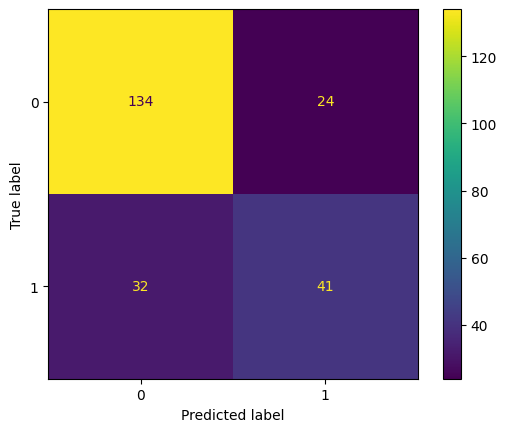

In [ ]:
# let's compute the confusion matrix and comapre the accuracies
cm_standard_log_transform = score_data(df_standard)
disp = ConfusionMatrixDisplay(cm_standard_log_transform)
disp.plot()


TP = cm_standard_log_transform[1, 1]
TN = cm_standard_log_transform[0, 0]
FP = cm_standard_log_transform[0, 1]
FN = cm_standard_log_transform[1, 0]

# Calculate Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate Precision
precision = TP / (TP + FP)

# Calculate Recall (Sensitivity)
recall = TP / (TP + FN)

# Calculate F1-Score
f1 = 2*((precision*recall)/(precision+recall))

# Print the metrics
print("Accuracy for df_standard after log transform:", accuracy)
print("Precision for df_standard after log transform:", precision)
print("Recall df_standard after log transform:", recall)
print("F1-Score for df_standard after log transform:", f1)

Accuracy for df_standard: 0.7662337662337663

**Accuracy for df_standard after log transform: 0.7575757575757576**

Accuracy for df_standard actually **decreased** after Log transformation

In [ ]:
# log transfom on minmax scaler
for column in df_minmax.columns:
  if column != 'Outcome':
    df_minmax[column] = np.log1p(df[column])

df_minmax.head(5)

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     1.945910  5.003946       4.290459       3.583519  0.000000  3.543854   
1     0.693147  4.454347       4.204693       3.401197  0.000000  3.317816   
2     2.197225  5.214936       4.174387       0.000000  0.000000  3.190476   
3     0.693147  4.499810       4.204693       3.178054  4.553877  3.370738   
4     0.000000  4.927254       3.713572       3.583519  5.129899  3.786460   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.486738  3.931826        1  
1                  0.300845  3.465736        0  
2                  0.514021  3.496508        1  
3                  0.154436  3.091042        0  
4                  1.190279  3.526361        1

Accuracy for df_minmax after log transform: 0.7575757575757576
Precision for df_minmax after log transform: 0.6307692307692307
Recall df_minmax after log transform: 0.5616438356164384
F1-Score for df_minmax after log transform: 0.5942028985507246


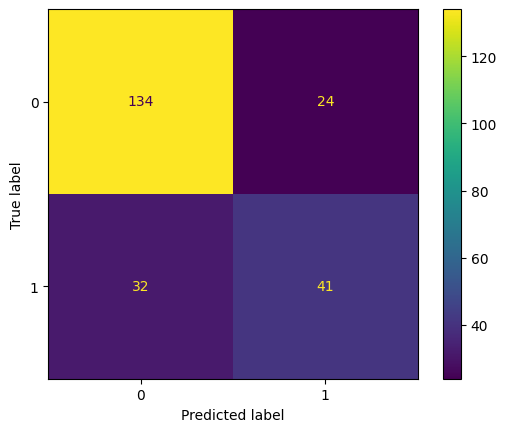

In [ ]:
# let's compute the confusion matrix for minmax scalar after log transform and comapre the accuracies
cm_minmax_log_transform = score_data(df_minmax)
disp = ConfusionMatrixDisplay(cm_minmax_log_transform)
disp.plot()


TP = cm_minmax_log_transform[1, 1]
TN = cm_minmax_log_transform[0, 0]
FP = cm_minmax_log_transform[0, 1]
FN = cm_minmax_log_transform[1, 0]

# Calculate Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate Precision
precision = TP / (TP + FP)

# Calculate Recall (Sensitivity)
recall = TP / (TP + FN)

# Calculate F1-Score
f1 = 2*((precision*recall)/(precision+recall))

# Print the metrics
print("Accuracy for df_minmax after log transform:", accuracy)
print("Precision for df_minmax after log transform:", precision)
print("Recall df_minmax after log transform:", recall)
print("F1-Score for df_minmax after log transform:", f1)

Accuracy for df_minmax after log transform: 0.7575757575757576

Accuracy for df_minmax: 0.7575757575757576

**There was no noticeable change in our accuracy after the log transformation in both the scaler dataframes.**

Since we did not achieve any substaintial increase in the accuracy after log transformation, then let's approach the problem from other direction:

Method 1: using the dataframe with imputed NaN values and directly removing outlires from that dataframe.

Method 2: Insted of using log transformation, we simply remove the outliers from the scaled dataframes.

Finally, comparing the accuracies of confusion matrix of both the methods.

**Method 1: Using the df-copy dataframe and removing outliers directly without scaling.**

In [ ]:
print(df_copy.shape)

df_copy_without_outliers= df_copy.copy(deep = True)
df_copy_without_outliers.shape

(768, 9)


(768, 9)

In [ ]:
from scipy import stats

#calculate z scores
z_scores = np.abs(stats.zscore(df_copy_without_outliers))

# remove outkliers based on z scores
df_copy_without_outliers = df_copy_without_outliers[(z_scores < 3).all(axis=1)]

df_copy_without_outliers.shape

(719, 9)

**Total 49 rows were removed**

Accuracy for df_copy_without_outliers: 0.7685185185185185
Precision for df_copy_without_outliers: 0.7551020408163265
Recall for df_copy_without_outliers: 0.49333333333333335
F1-Score for df_copy_without_outliers 0.5967741935483871


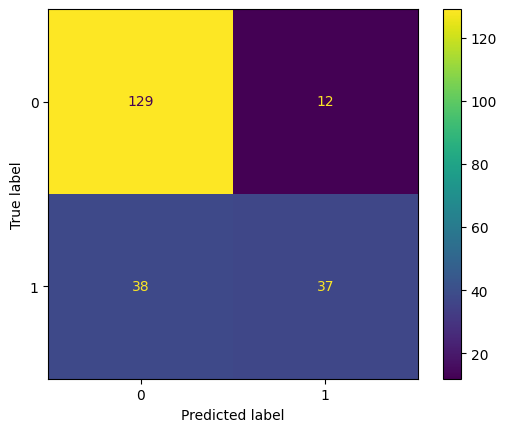

In [ ]:
# calculating the confusion matrix
cm_df_copy_without_outliers = score_data(df_copy_without_outliers)
disp = ConfusionMatrixDisplay(cm_df_copy_without_outliers)
disp.plot()


TP = cm_df_copy_without_outliers[1, 1]
TN = cm_df_copy_without_outliers[0, 0]
FP = cm_df_copy_without_outliers[0, 1]
FN = cm_df_copy_without_outliers[1, 0]

# Calculate Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate Precision
precision = TP / (TP + FP)

# Calculate Recall (Sensitivity)
recall = TP / (TP + FN)

# Calculate F1-Score
f1 = 2*((precision*recall)/(precision+recall))

# Print the metrics
print("Accuracy for df_copy_without_outliers:", accuracy)
print("Precision for df_copy_without_outliers:", precision)
print("Recall for df_copy_without_outliers:", recall)
print("F1-Score for df_copy_without_outliers", f1)

**Accuracy for df_copy_without_outliers: 0.7685185185185185**

Accuracy for df_copy: 0.7489177489177489

**Approx 2% accuracy increase**

Method 2:
Creating copies from df_copy and scaling with minmax and standard scaling techniques

Removing outliers based on z scores

computing confusion matrix

In [ ]:
df_minmax_without_outliers = df_copy.copy(deep = True)
df_standard_without_outliers = df_copy.copy(deep = True)

# Creating a minmax scaler
scaler_minmax = MinMaxScaler()
columns_to_scale = [col for col in df_minmax_without_outliers.columns if col != 'Outcome']
df_minmax_without_outliers[columns_to_scale] = scaler_minmax.fit_transform(df_minmax_without_outliers[columns_to_scale])

print(df_minmax_without_outliers.head(5))

# creating Z-score scaler
scaler_standard = StandardScaler()
columns_to_scale = [col for col in df_standard_without_outliers.columns if col != 'Outcome']
df_standard_without_outliers[columns_to_scale] = scaler_standard.fit_transform(df_standard_without_outliers[columns_to_scale])

print(df_standard_without_outliers.head(5))

print(df_minmax_without_outliers.shape)
print(df_standard_without_outliers.shape)


   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.670968       0.489796       0.304348  0.170130  0.314928   
1     0.058824  0.264516       0.428571       0.239130  0.170130  0.171779   
2     0.470588  0.896774       0.408163       0.240798  0.170130  0.104294   
3     0.058824  0.290323       0.428571       0.173913  0.096154  0.202454   
4     0.000000  0.600000       0.163265       0.304348  0.185096  0.509202   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333        1  
1                  0.116567  0.166667        0  
2                  0.253629  0.183333        1  
3                  0.038002  0.000000        0  
4                  0.943638  0.200000        1  
   Pregnancies   Glucose  BloodPressure  SkinThickness       Insulin  \
0     0.639947  0.865108      -0.033518   6.655021e-01 -3.345079e-16   
1    -0.844885 -1.206162      -0.529859  -1.746338e-02 -3.345079e-16   
2     1.233880  2.015

In [ ]:
#calculate z scores for df_minmax_without_outliers
z_scores = np.abs(stats.zscore(df_minmax_without_outliers))

# remove outkliers based on z scores
df_minmax_without_outliers = df_minmax_without_outliers[(z_scores < 3).all(axis=1)]

print(df_minmax_without_outliers.shape)

#calculate z scores for df_standard_without_outliers
z_scores = np.abs(stats.zscore(df_standard_without_outliers))

# remove outkliers based on z scores
df_standard_without_outliers = df_standard_without_outliers[(z_scores < 3).all(axis=1)]

print(df_standard_without_outliers.shape)

(719, 9)
(719, 9)


**For both scaled dataframes 49 rows were removed**

(719, 9)
Accuracy for df_minmax_without_outliers: 0.7731481481481481
Precision for df_minmax_without_outliers: 0.8095238095238095
Recall for df_minmax_without_outliers: 0.4533333333333333
F1-Score for df_minmax_without_outliers 0.5811965811965811


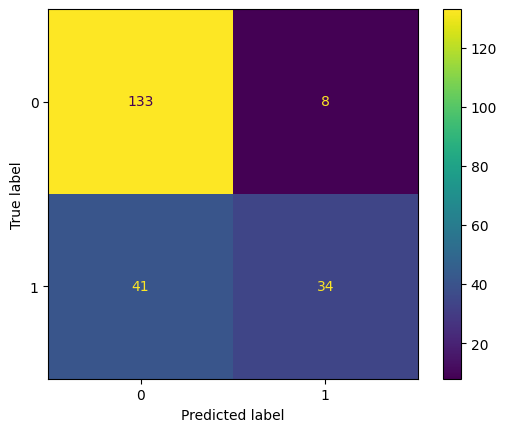

In [ ]:
# calculating the confusion matrix for df_minmax_without_outliers
print(df_minmax_without_outliers.shape)
cm_df_minmax_without_outliers = score_data(df_minmax_without_outliers)
disp = ConfusionMatrixDisplay(cm_df_minmax_without_outliers)
disp.plot()


TP = cm_df_minmax_without_outliers[1, 1]
TN = cm_df_minmax_without_outliers[0, 0]
FP = cm_df_minmax_without_outliers[0, 1]
FN = cm_df_minmax_without_outliers[1, 0]

# Calculate Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate Precision
precision = TP / (TP + FP)

# Calculate Recall (Sensitivity)
recall = TP / (TP + FN)

# Calculate F1-Score
f1 = 2*((precision*recall)/(precision+recall))

# Print the metrics
print("Accuracy for df_minmax_without_outliers:", accuracy)
print("Precision for df_minmax_without_outliers:", precision)
print("Recall for df_minmax_without_outliers:", recall)
print("F1-Score for df_minmax_without_outliers", f1)

**Accuracy for df_minmax_without_outliers: 0.7731481481481481**

Accuracy for df_minmax after log transform: 0.7575757575757576

Accuracy for df_minmax: 0.7575757575757576

Accuracy for df_standard_without_outliers: 0.7685185185185185
Precision for df_standard_without_outliers: 0.7551020408163265
Recall for df_standard_without_outliers: 0.49333333333333335
F1-Score for df_standard_without_outliers 0.5967741935483871


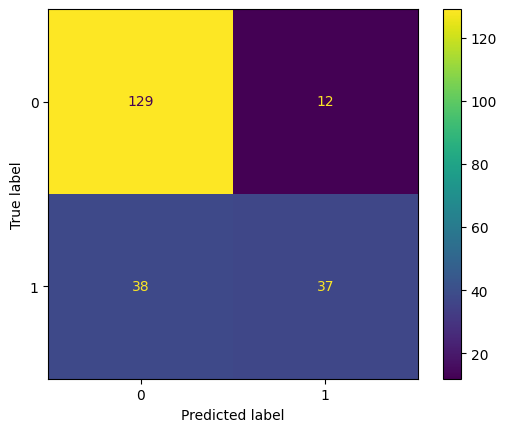

In [ ]:
# calculating the confusion matrix for df_standard_without_outliers
cm_df_standard_without_outliers = score_data(df_standard_without_outliers)
disp = ConfusionMatrixDisplay(cm_df_standard_without_outliers)
disp.plot()


TP = cm_df_standard_without_outliers[1, 1]
TN = cm_df_standard_without_outliers[0, 0]
FP = cm_df_standard_without_outliers[0, 1]
FN = cm_df_standard_without_outliers[1, 0]

# Calculate Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate Precision
precision = TP / (TP + FP)

# Calculate Recall (Sensitivity)
recall = TP / (TP + FN)

# Calculate F1-Score
f1 = 2*((precision*recall)/(precision+recall))

# Print the metrics
print("Accuracy for df_standard_without_outliers:", accuracy)
print("Precision for df_standard_without_outliers:", precision)
print("Recall for df_standard_without_outliers:", recall)
print("F1-Score for df_standard_without_outliers", f1)

**Accuracy for df_standard_without_outliers: 0.7685185185185185**


Accuracy for df_standard: 0.7662337662337663

Accuracy for df_standard after log transform: 0.7575757575757576



Uptill now the **best accuracy** was for the **sclaed dataframe with minmax scaling and removed outliers** i.e. **0.7731481481481481**

On more thing that we can do to increase the accuracy is **feature selection**

Feature selection methods can be used to identify and remove unneeded, irrelevant and redundant attributes from data that do not contribute to the accuracy of a predictive model or may in fact decrease the accuracy of the model.

**Let's start with correlation analysis on df_minmax_without_outliers**


In [ ]:
correlation_matrix = df_minmax_without_outliers.corr()
relevant_features = correlation_matrix['Outcome'].abs().sort_values(ascending=False)
print(relevant_features)

df_selected = df_minmax_without_outliers.copy(deep = True)
df_selected.shape

Outcome                     1.000000
Glucose                     0.487751
BMI                         0.302774
Age                         0.245544
Insulin                     0.236633
Pregnancies                 0.217706
DiabetesPedigreeFunction    0.209408
SkinThickness               0.200903
BloodPressure               0.189094
Name: Outcome, dtype: float64


(719, 9)

Now that we have the list of relevant features in descensing order, lets choose most relevant features and compute the confusion matrix for that

In [ ]:
top_features = ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']
features =  top_features + ['Outcome']
df_selected = df_selected[features]
df_selected.head(5)

Glucose       BMI       Age  DiabetesPedigreeFunction  Outcome
0  0.670968  0.314928  0.483333                  0.234415        1
1  0.264516  0.171779  0.166667                  0.116567        0
2  0.896774  0.104294  0.183333                  0.253629        1
3  0.290323  0.202454  0.000000                  0.038002        0
5  0.464516  0.151329  0.150000                  0.052519        0

Accuracy for df_relevant_features: 0.7731481481481481
Precision for df_relevant_features: 0.8095238095238095
Recall for df_relevant_features: 0.4533333333333333
F1-Score for df_relevant_features: 0.5811965811965811


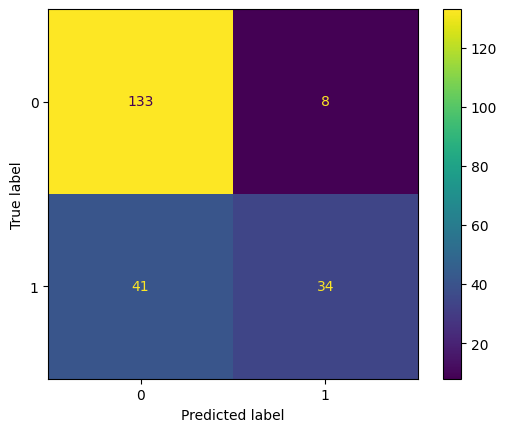

In [ ]:
# calculating the confusion matrix for df_selected
cm_df_selected = score_data(df_selected)
disp = ConfusionMatrixDisplay(cm_df_selected)
disp.plot()

TP = cm_df_selected[1, 1]
TN = cm_df_selected[0, 0]
FP = cm_df_selected[0, 1]
FN = cm_df_selected[1, 0]

# Calculate Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate Precision
precision = TP / (TP + FP)

# Calculate Recall (Sensitivity)
recall = TP / (TP + FN)

# Calculate F1-Score
f1 = 2*((precision*recall)/(precision+recall))

# Print the metrics
print("Accuracy for df_relevant_features:", accuracy)
print("Precision for df_relevant_features:", precision)
print("Recall for df_relevant_features:", recall)
print("F1-Score for df_relevant_features:", f1)

**Accuracy for df_relevant_features: 0.7731481481481481**

the best accureacu uptill now was of df_minmax_without_outliers: 0.7731481481481481

**Feature selection with only keeping the relevant features did not have any significant affect in the accuracy**

**Accuracy remained the same**


**ANOVA-F test** to get the top 5 features from the dataset

In [ ]:
df_minmax_without_outliers.head(5)


Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.670968       0.489796       0.304348  0.170130  0.314928   
1     0.058824  0.264516       0.428571       0.239130  0.170130  0.171779   
2     0.470588  0.896774       0.408163       0.240798  0.170130  0.104294   
3     0.058824  0.290323       0.428571       0.173913  0.096154  0.202454   
5     0.294118  0.464516       0.510204       0.240798  0.170130  0.151329   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333        1  
1                  0.116567  0.166667        0  
2                  0.253629  0.183333        1  
3                  0.038002  0.000000        0  
5                  0.052519  0.150000        0

Implemenmting the test and printing the list of 5 most imoportant features.


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X = df_minmax_without_outliers.drop(columns=['Outcome'])
y = df_minmax_without_outliers['Outcome']

# Perform the ANOVA F-test and select the top k features
k = 5
# Initialize the SelectKBest object with the ANOVA F-test scoring function
best_features = SelectKBest(score_func=f_classif, k=k)

# Fit the feature selector to my data and transform it to select the top k features
X_new = best_features.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = best_features.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

print("Selected features:", selected_features)

Selected features: Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age'], dtype='object')


Now we have the list of most important features we can evaluate the model only using these features and check the accuracy.

In [ ]:
imp_features = ['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age']
features =  imp_features + ['Outcome']
df_minmax_without_outliers = df_minmax_without_outliers[features]
df_minmax_without_outliers.head(5)

Pregnancies   Glucose   Insulin       BMI       Age  Outcome
0     0.352941  0.670968  0.170130  0.314928  0.483333        1
1     0.058824  0.264516  0.170130  0.171779  0.166667        0
2     0.470588  0.896774  0.170130  0.104294  0.183333        1
3     0.058824  0.290323  0.096154  0.202454  0.000000        0
5     0.294118  0.464516  0.170130  0.151329  0.150000        0

Accuracy for df_minmax_without_outliers: 0.7685185185185185
Precision for df_minmax_without_outliers: 0.7551020408163265
Recall for df_minmax_without_outliers: 0.49333333333333335
F1-Score for df_minmax_without_outliers 0.5967741935483871


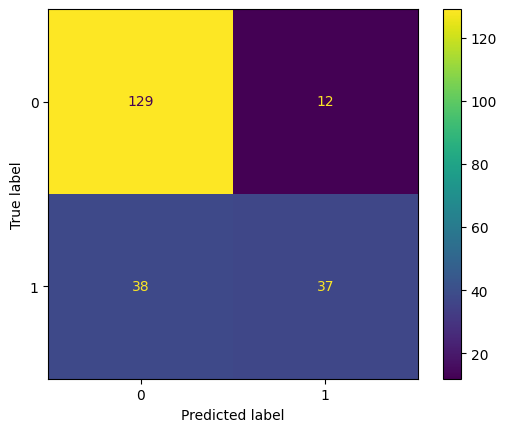

In [ ]:
# calculating the confusion matrix for df_minmax_without_outliers after ANOVA-F test
cm_df_minmax_without_outliers = score_data(df_standard_without_outliers)
disp = ConfusionMatrixDisplay(cm_df_minmax_without_outliers)
disp.plot()


TP = cm_df_minmax_without_outliers[1, 1]
TN = cm_df_minmax_without_outliers[0, 0]
FP = cm_df_minmax_without_outliers[0, 1]
FN = cm_df_minmax_without_outliers[1, 0]

# Calculate Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate Precision
precision = TP / (TP + FP)

# Calculate Recall (Sensitivity)
recall = TP / (TP + FN)

# Calculate F1-Score
f1 = 2*((precision*recall)/(precision+recall))

# Print the metrics
print("Accuracy for df_minmax_without_outliers:", accuracy)
print("Precision for df_minmax_without_outliers:", precision)
print("Recall for df_minmax_without_outliers:", recall)
print("F1-Score for df_minmax_without_outliers", f1)

**Accuracy for df_minmax_without_outliers after ANOVA-F test : 0.7685185185185185**

The accuracy decreased slightly.

**The BEST accuracy I got after my EDA is 77.31%**

#Model
How did your preparation of the data impact the LogisticRegression model?

Compare the initial confusion matrix to the confusion matrix after you have completed EDA and preparation.

During my EDA, **data leakage occured**, so it affected the predictions of the model and therefore the calculated accuracies may not be the the optimal ones.

***Confusion matrix for the Base dataset and the Transformed dataset with best accuracy.***


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


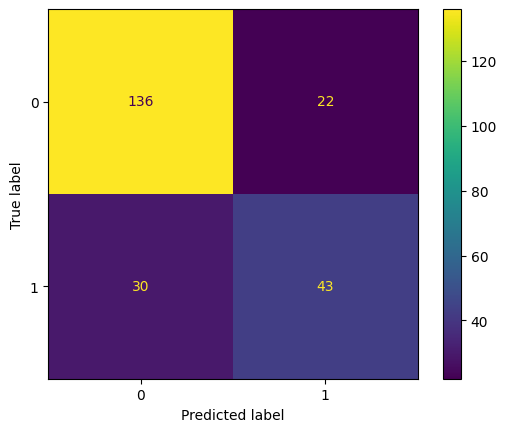

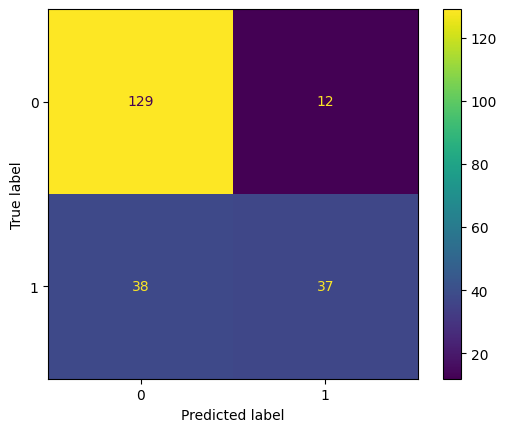

In [ ]:
cm = score_data(df)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

cm_df_minmax_without_outliers = score_data(df_standard_without_outliers)
disp = ConfusionMatrixDisplay(cm_df_minmax_without_outliers)
disp.plot()



**Comparing the accuracies of Base Dataset and the Final Dataset after EDA**

Accuracy for df_minmax_without_outliers: 77.31%


Accuracy for Base Dataframe: 77.48%

Reasons for dropped accuracy:

1. Data leakage: In the begining i did not split my data into training and test sample to perform data exploration and transformations.

2. Data Imbalance: When I looked at the outcome column the number of rows with 0 output were considerabely more. It may be possible that the test set will also have imbalance of outcomes which may lead to skewed accuracies.



# Leakage Assessment

Can you describe in what ways your data preparation might be "leaking" information from the training data to the test data


Data leakage during EDA happens when you inadvertently use information from the test data while exploring and understanding your dataset.

During my EDA I performed some operations on my dataframe which may have leaked the data to the test set.


1. **Summary Statistics**: Calculating summary statistics (e.g., mean, median, standard deviation) for a feature across the entire dataset, including the test set, can leak information. These statistics should've been computed separately for the training and test sets, but I calculate that for the whole dataset.

2. **Data Visualization:** Creating data visualizations, such as histograms, box plots, or scatter plots, using the entire dataset, including the test set, can lead to information leakage. Visualizations should be based on the training set only. I performed the visiulasations for the whole dataset.

3. **Outlier Detection**: Identifying and handling outliers in the combined dataset (training + test) can lead to biased results. Im ny EDA I performed outlier detection on the whole dataset.

4. **Correlation Analysis:** Calculating correlations between features without distinguishing between training and test data can lead to information leakage.
I performed coorelation analysis on the complete dataset.

5. **Handling Missing Values:** Deciding on strategies for handling missing values (e.g., imputation methods) based on information from both sets can introduce leakage. Missing value handling should be determined independently for each dataset. When i replaced the missing values for with the mean or the medial of the column, i did it for the complete datset.

6. **Feature Selection:** During my feature selection step also, i calculated the importance of feature according to the complete dataset.